In [1]:
import pandas as pd

import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Closed set binary

Train on train set

Grid search on dev set

Evaluation on eval set

In [23]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_binary'


In [38]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features = ['lpc', 'bicoh', 'unet']
selected_features = ['lpc', 'bicoh']
number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore"]
classifiers_keys = ["svm", "rf"]


In [39]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])

for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))
                cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                           normalize='true')
                cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                         normalize='true')
                cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                          normalize='true')

                acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                       number_lpc_order, stop_lpc_order,
                                                       n, c, 
                                                       acc_train, acc_dev, acc_eval,
                                                       cm_train, cm_dev, cm_eval, result_dict['best_model']]
                        


In [40]:
len(results_df)

6

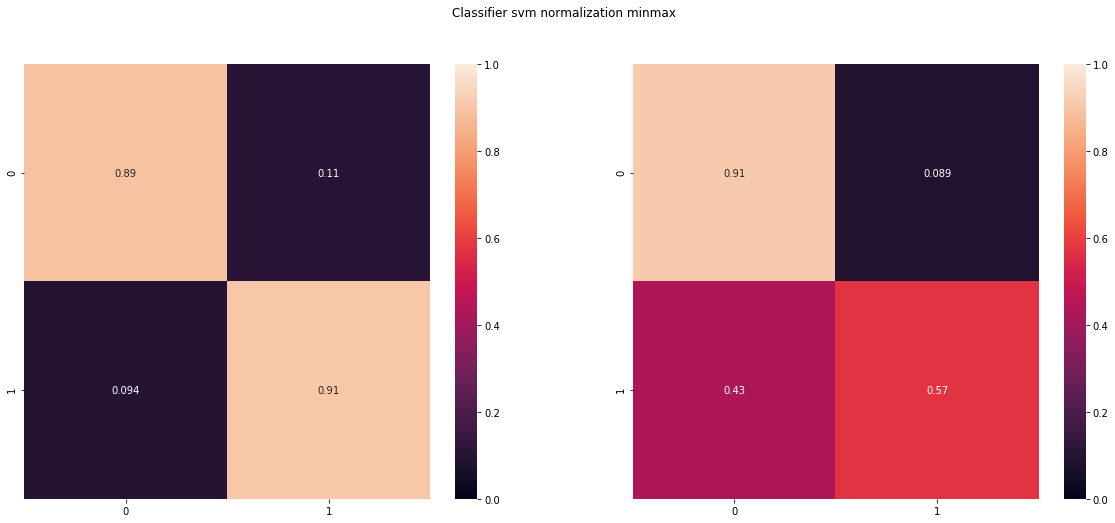

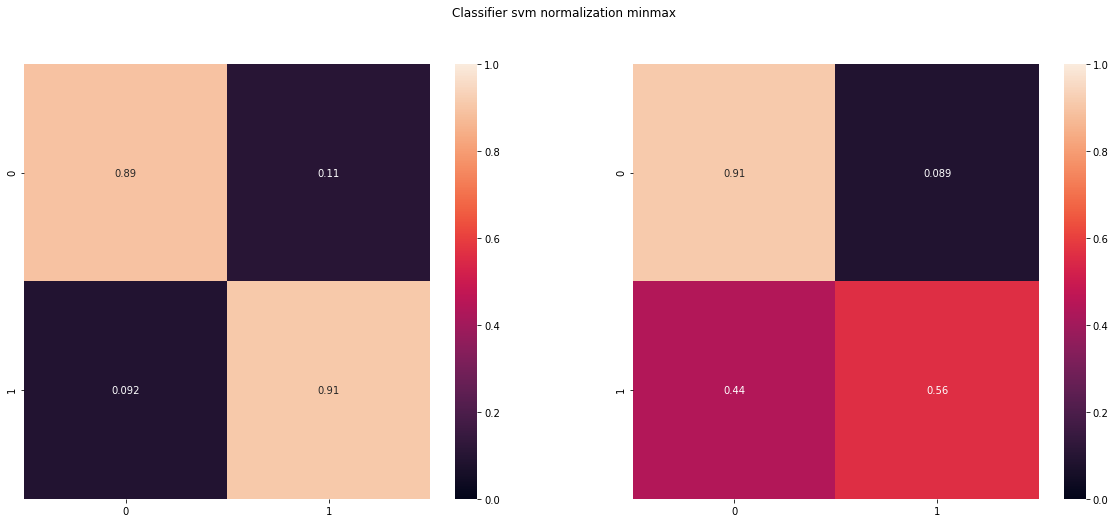

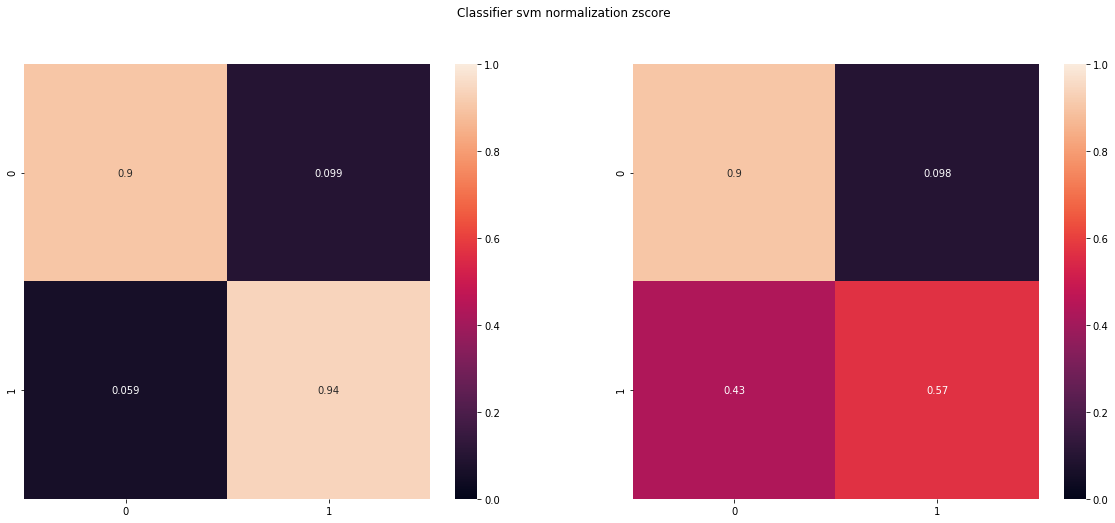

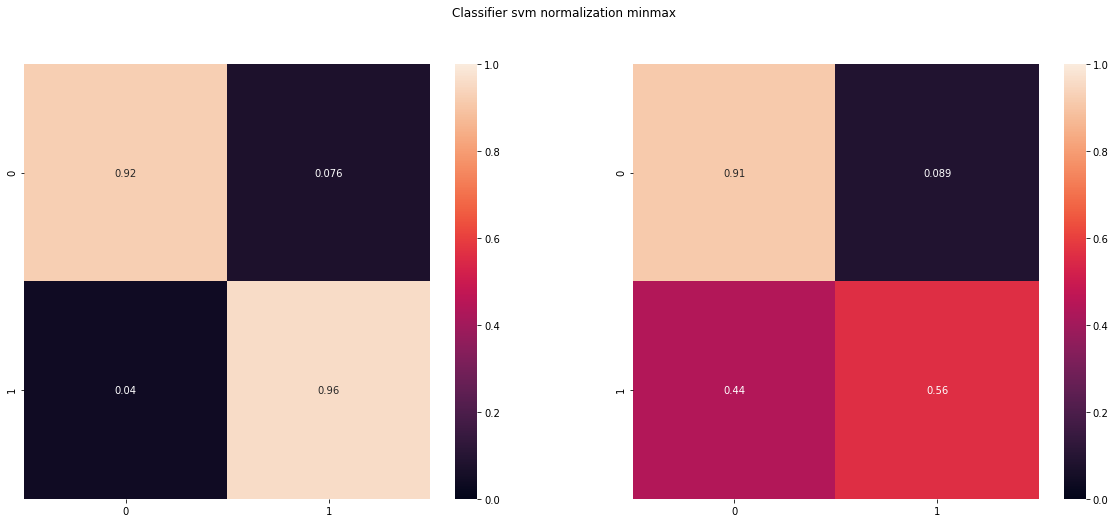

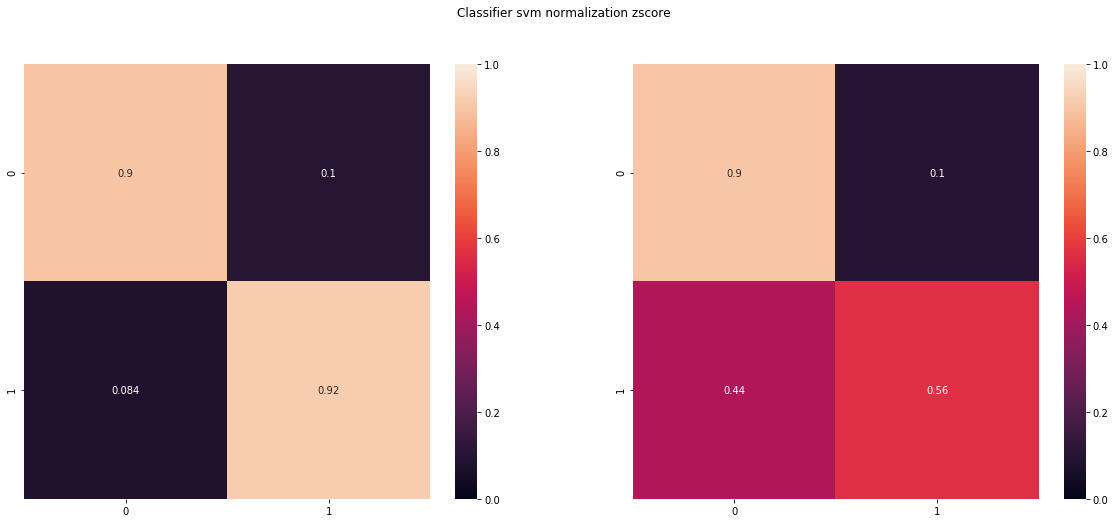

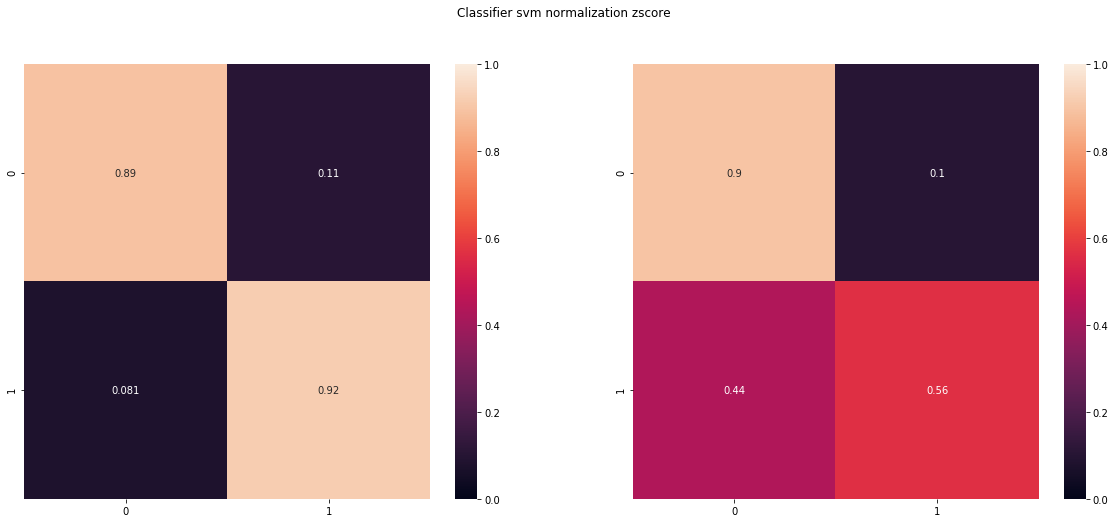

In [41]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)
for index, row in results_df.iterrows():
    if index > 10:
        break
        
    plt.figure(figsize = (20,8))
    plt.suptitle("Classifier {} normalization {}".format(row['classifier'], row['normalization']))

    #plt.subplot(131)
    #sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(121)
    sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(122)
    sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)
    
    plt.show()

In [42]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)

for index, row in results_df.iterrows():
    #if row['classifier'] == 'svm':
    if True:
        print("Classifier {} normalization {}".format(row['classifier'], row['normalization']))
        print("Acc train {} Acc dev {} Acc eval {}".format(row['accuracy_train'],
                                                           row['accuracy_dev'],
                                                           row['accuracy_eval']))
        print("Best model {}".format(row['model_params']))


Classifier svm normalization minmax
Acc train 0.9386609232914306 Acc dev 0.900334726903973 Acc eval 0.7411328478317702
Best model {'class__C': 1000, 'class__decision_function_shape': 'ovo', 'class__gamma': 'auto', 'class__kernel': 'rbf'}
Classifier svm normalization minmax
Acc train 0.9391199474590313 Acc dev 0.9002828859128083 Acc eval 0.7366208986035945
Best model {'class__C': 1000, 'class__decision_function_shape': 'ovo', 'class__gamma': 'auto', 'class__kernel': 'rbf'}
Classifier svm normalization zscore
Acc train 0.9617854780734534 Acc dev 0.9209011985003124 Acc eval 0.7354554971820977
Best model {'class__C': 1, 'class__decision_function_shape': 'ovo', 'class__kernel': 'linear'}
Classifier svm normalization minmax
Acc train 0.9785575024395159 Acc dev 0.9419062326291108 Acc eval 0.735406366066626
Best model {'class__C': 1000, 'class__decision_function_shape': 'ovo', 'class__kernel': 'linear'}
Classifier svm normalization zscore
Acc train 0.9421494924895047 Acc dev 0.9066762969743707

In [43]:
results_df

,nfft,hop_size,selected_features,number_lpc_order,stop_lpc_order,normalization,classifier,accuracy_train,accuracy_dev,accuracy_eval,cm_train,cm_dev,cm_eval,model_params
0,512,256,"[lpc, bicoh]",49,50,minmax,svm,0.938661,0.900335,0.741133,"[[0.9531374106433678, 0.04686258935663225], [0...","[[0.8944973107157633, 0.10550268928423666], [0...","[[0.9113636363636364, 0.08863636363636364], [0...","{'class__C': 1000, 'class__decision_function_s..."
1,256,128,"[lpc, bicoh]",49,50,minmax,svm,0.939120,0.900283,0.736621,"[[0.954328832406672, 0.04567116759332804], [0....","[[0.8928423665701283, 0.10715763342987174], [0...","[[0.9113636363636364, 0.08863636363636364], [0...","{'class__C': 1000, 'class__decision_function_s..."
2,256,128,"[lpc, bicoh]",49,50,zscore,svm,0.961785,0.920901,0.735455,"[[0.9670373312152502, 0.0329626687847498], [0....","[[0.9007033512618949, 0.09929664873810509], [0...","[[0.9015625, 0.0984375], [0.43065150563580473,...","{'class__C': 1, 'class__decision_function_shap..."
3,128,64,"[lpc, bicoh]",49,50,minmax,svm,0.978558,0.941906,0.735406,"[[0.9821286735504369, 0.017871326449563147], [...","[[0.9242863053371949, 0.07571369466280513], [0...","[[0.9106534090909091, 0.0893465909090909], [0....","{'class__C': 1000, 'class__decision_function_s..."
4,512,256,"[lpc, bicoh]",49,50,zscore,svm,0.942149,0.906676,0.731780,"[[0.9515488482922955, 0.048451151707704525], [...","[[0.896979726934216, 0.10302027306578403], [0....","[[0.9004261363636363, 0.09957386363636364], [0...","{'class__C': 0.1, 'class__decision_function_sh..."
5,128,64,"[lpc, bicoh]",49,50,zscore,svm,0.938637,0.906267,0.731194,"[[0.9447974583002383, 0.055202541699761715], [...","[[0.8936698386429458, 0.1063301613570542], [0....","[[0.8982954545454546, 0.10170454545454545], [0...","{'class__C': 0.1, 'class__decision_function_sh..."


## Results class by class

In [44]:
alg_dict = {'A01': 1, 'A02': 2, 'A03': 3, 'A04': 4, 'A05': 5, 'A06': 6,
                'A07': 7, 'A08': 8, 'A09': 9, 'A10': 10, 'A11': 11, 'A12': 12, 'A13': 13,
                'A14': 14, 'A15': 15, 'A16': 16, 'A17': 17, 'A18': 18, 'A19': 19}

alg_dev_dict = {'A01': 1, 'A02': 2, 'A03': 3, 'A04': 4, 'A05': 5, 'A06': 6}
alg_eval_dict = {'A07': 7, 'A08': 8, 'A09': 9, 'A10': 10, 'A11': 11, 'A12': 12, 'A13': 13,
                'A14': 14, 'A15': 15, 'A16': 16, 'A17': 17, 'A18': 18, 'A19': 19}

In [45]:
alg_results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_dev','accuracy_eval',
                                   'cm_dev','cm_eval',
                                   'model_params','alg' ])





for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))

                for key_alg in alg_dict:
                    if key_alg in alg_dev_dict:
                        y_predict_dev = result_dict['y_predict_dev']
                        y_dev = result_dict['y_dev']
                        y_dev_orig = result_dict['y_dev_orig']



                        selected_indexes = [a or b for a, b in zip(y_dev_orig == alg_dict[key_alg], y_dev_orig == 0)]

                        y_predict_dev = y_predict_dev[selected_indexes]
                        y_dev = y_dev[selected_indexes]

                        cm_dev = confusion_matrix(y_dev, y_predict_dev, normalize='true')
                        acc_dev = balanced_accuracy_score(y_dev, y_predict_dev)

                        alg_results_df.loc[len(alg_results_df.index)] = [nfft, hop_size, selected_features,
                                                                       number_lpc_order, stop_lpc_order,
                                                                       n, c, acc_dev, None, cm_dev, None, 
                                                                       result_dict['best_model'], key_alg
                                                                      ]
                        
                    if key_alg in alg_eval_dict:
                        
                        y_predict_eval = result_dict['y_predict_eval']
                        y_eval = result_dict['y_eval']
                        y_eval_orig = result_dict['y_eval_orig']



                        selected_indexes = [a or b for a, b in zip(y_eval_orig == alg_dict[key_alg], y_eval_orig == 0)]

                        y_predict_eval = y_predict_eval[selected_indexes]
                        y_eval = y_eval[selected_indexes]

                        cm_eval = confusion_matrix(y_eval, y_predict_eval, normalize='true')
                        acc_eval = balanced_accuracy_score(y_eval, y_predict_eval)

                        alg_results_df.loc[len(alg_results_df.index)] = [nfft, hop_size, selected_features,
                                                                       number_lpc_order, stop_lpc_order,
                                                                       n, c, None, acc_eval, None, cm_eval, 
                                                                       result_dict['best_model'], key_alg
                                                                      ]

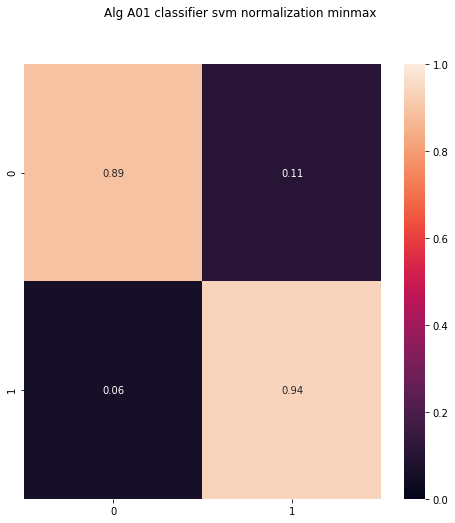

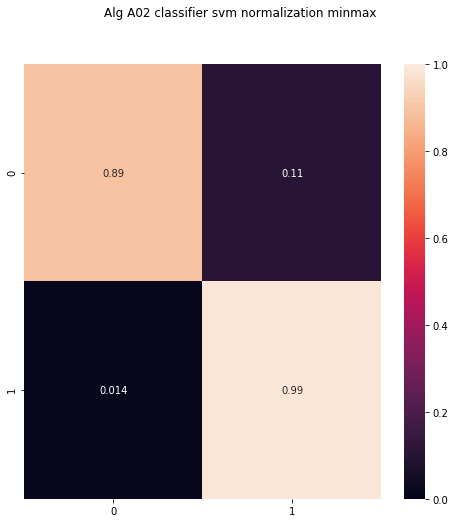

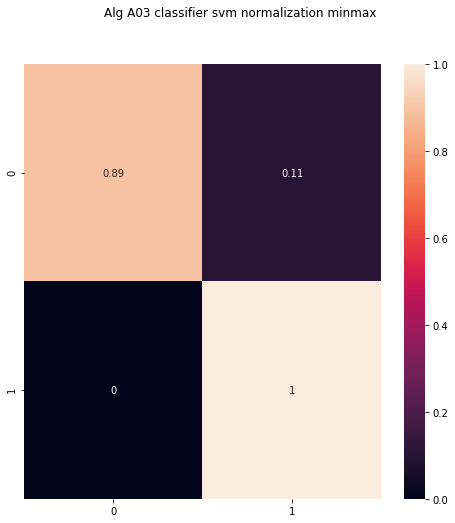

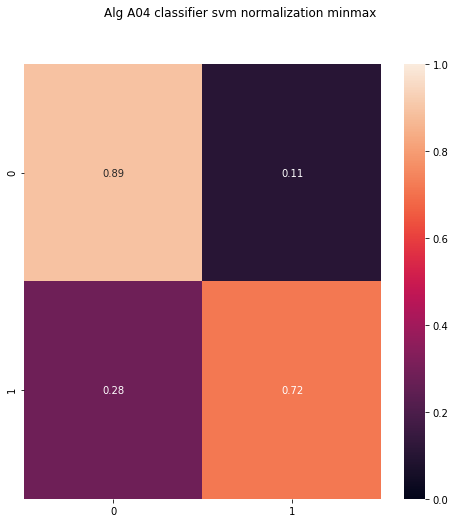

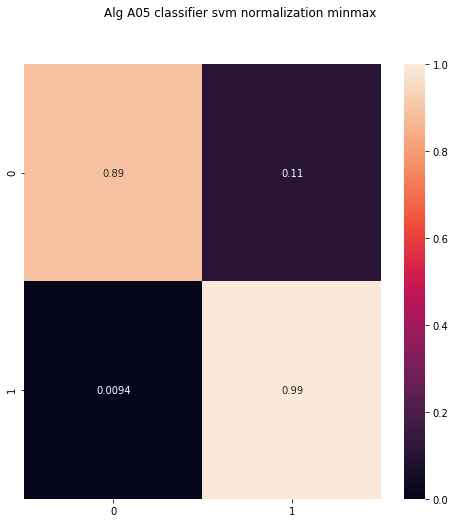

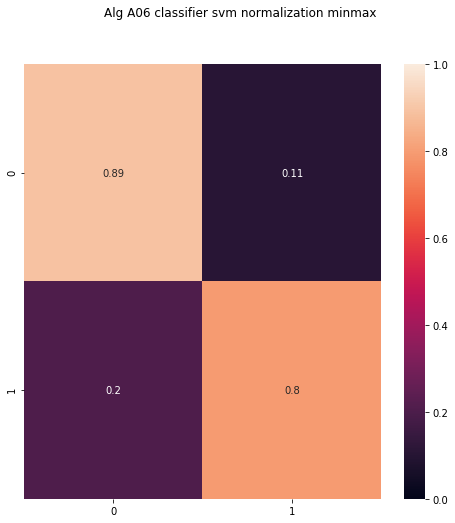

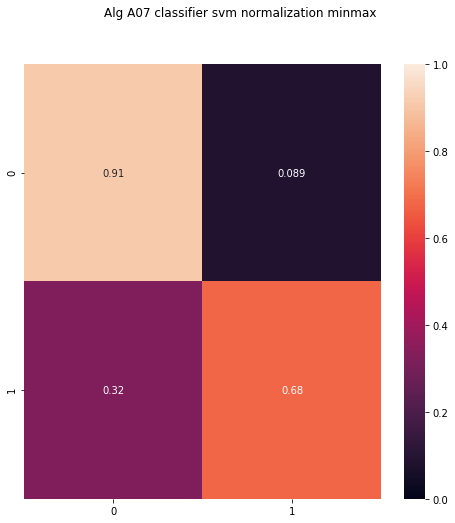

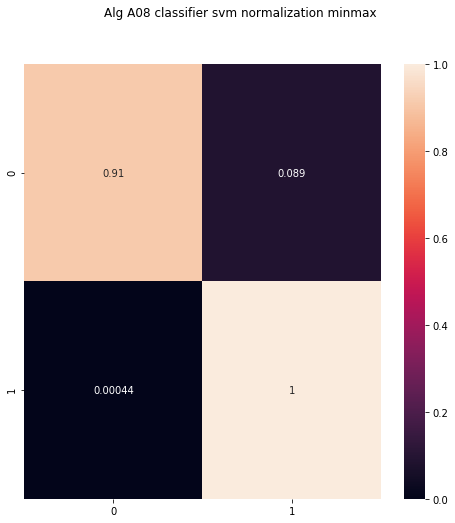

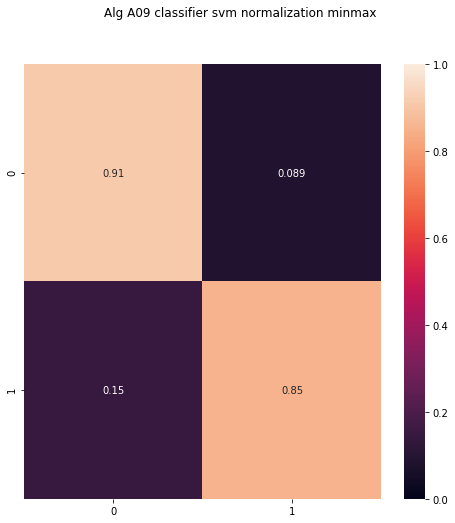

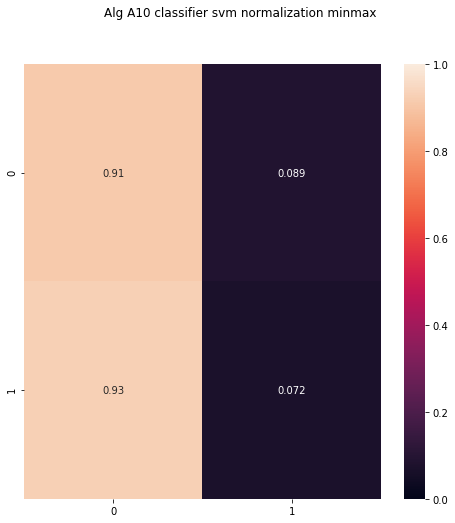

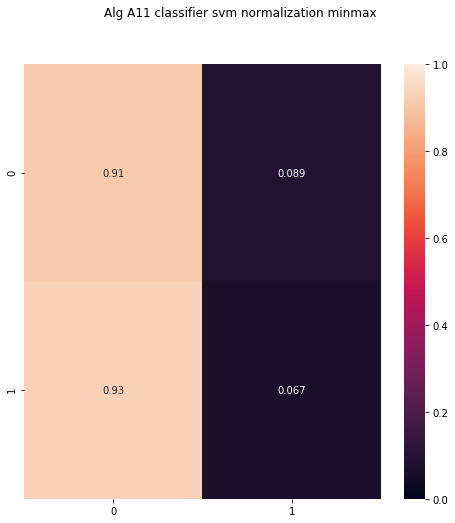

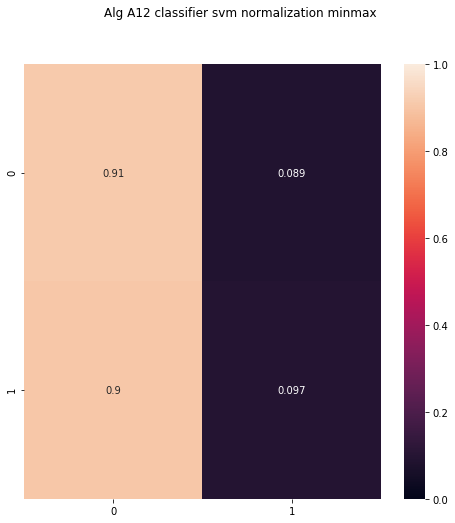

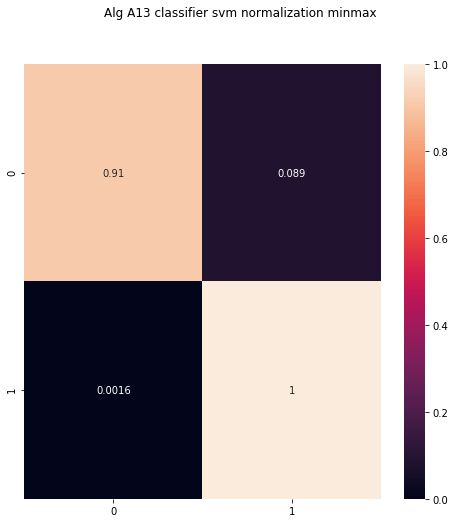

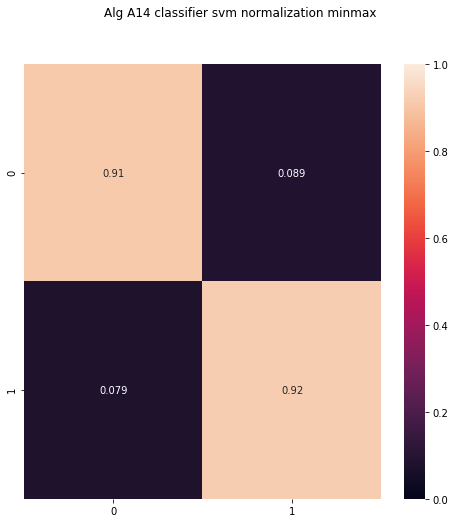

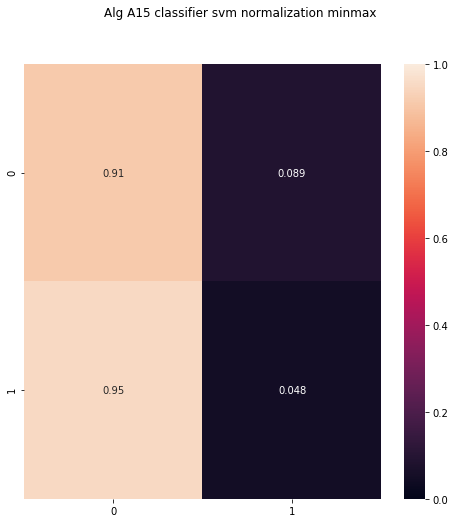

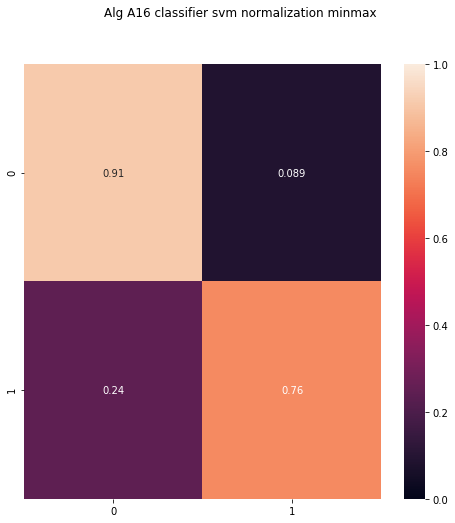

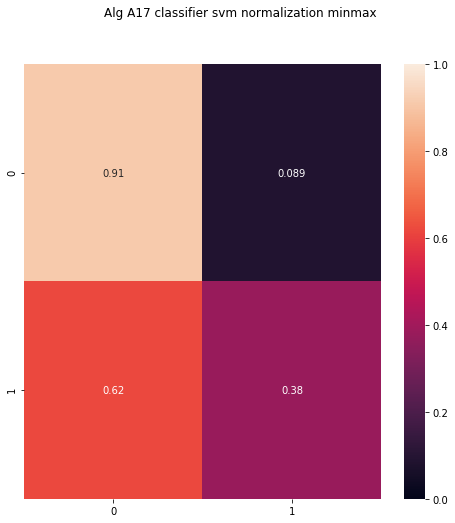

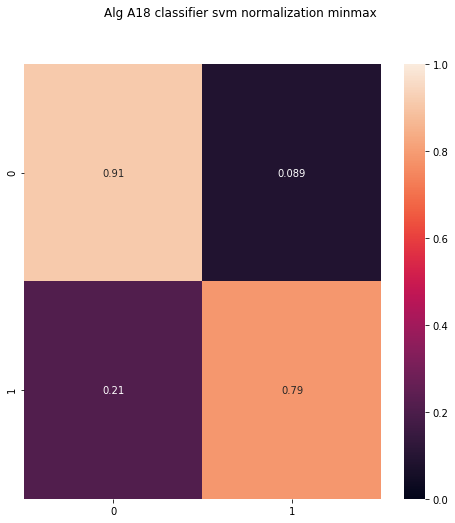

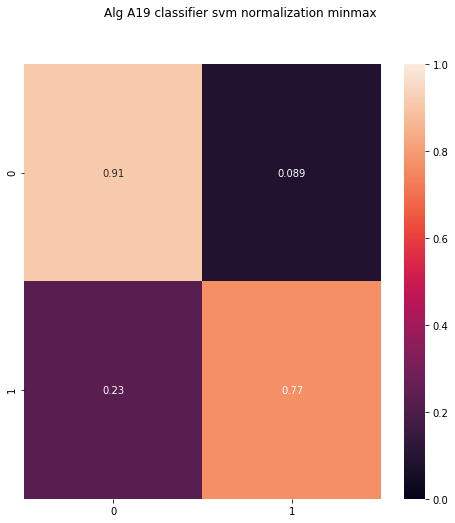

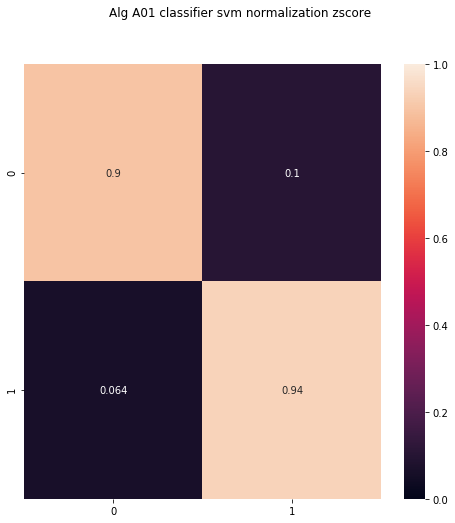

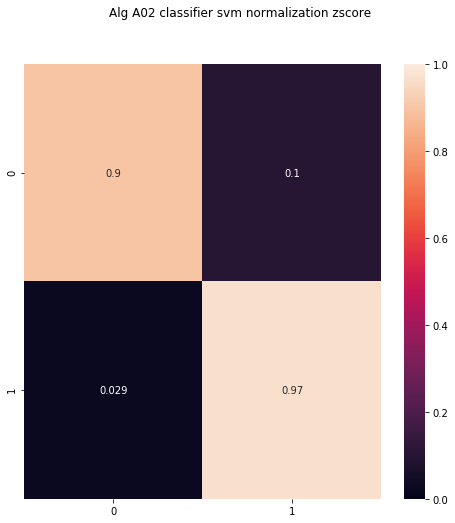

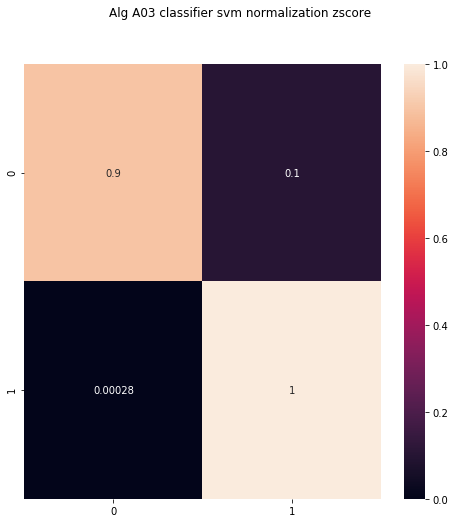

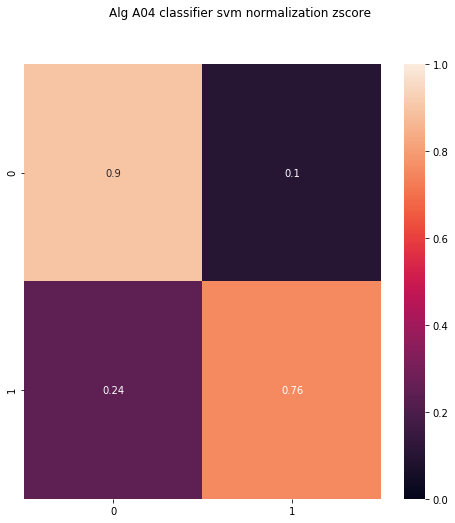

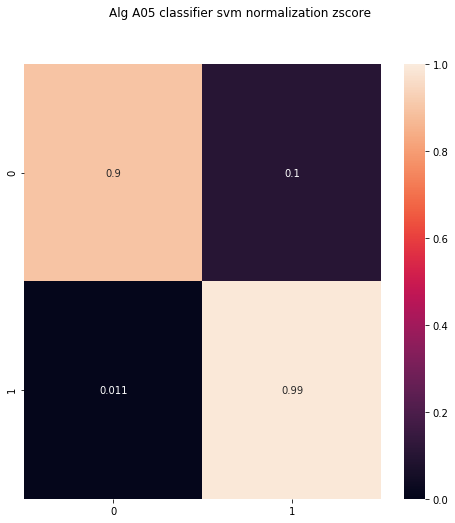

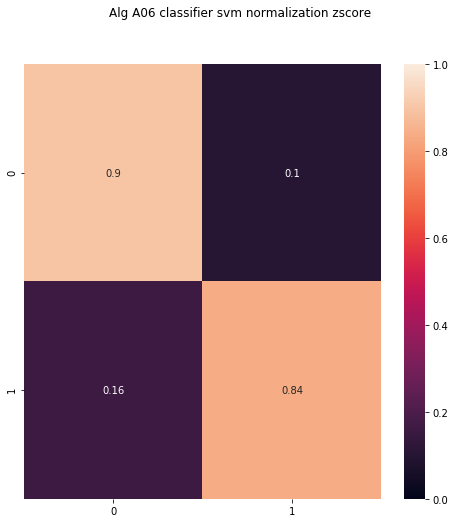

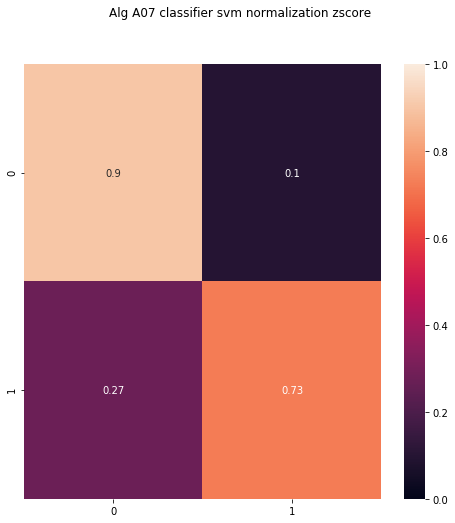

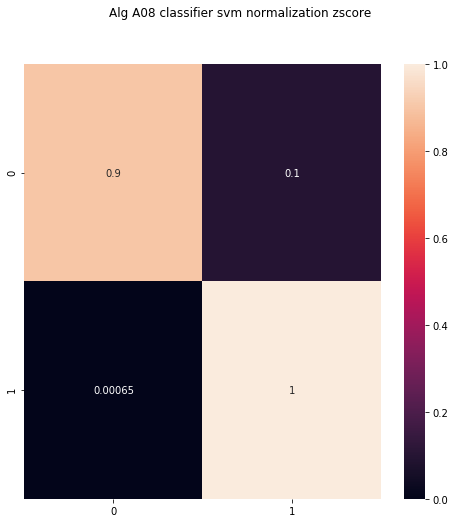

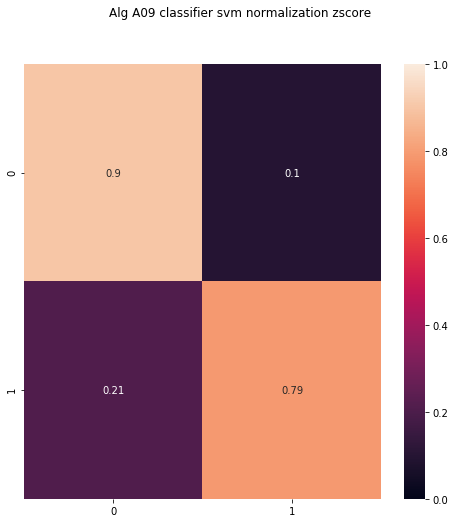

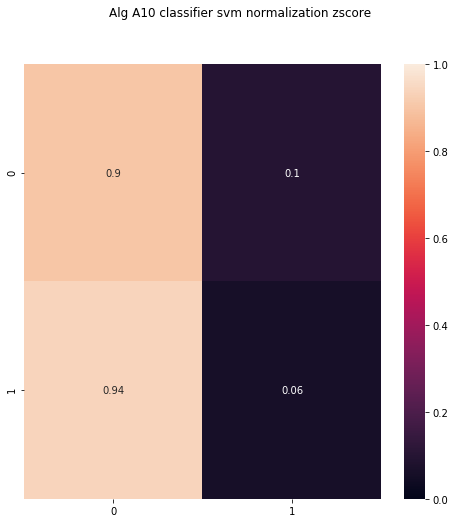

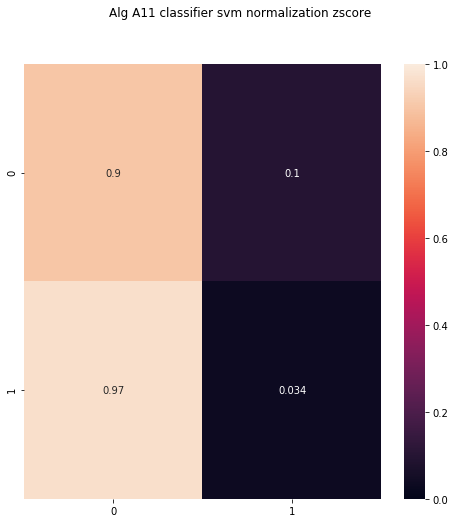

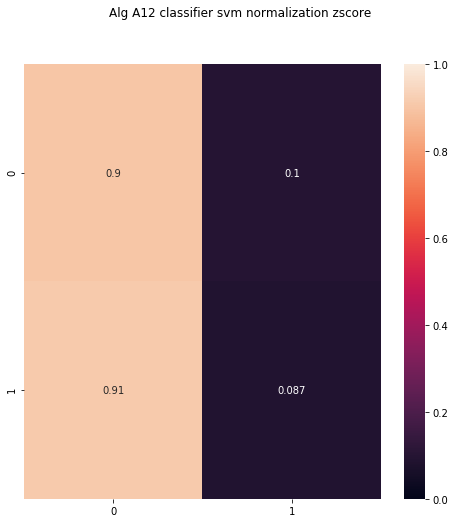

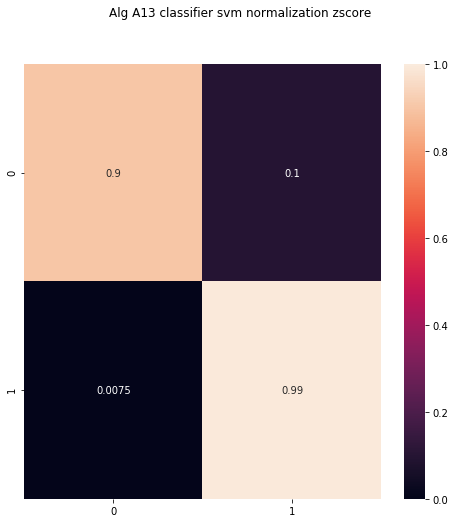

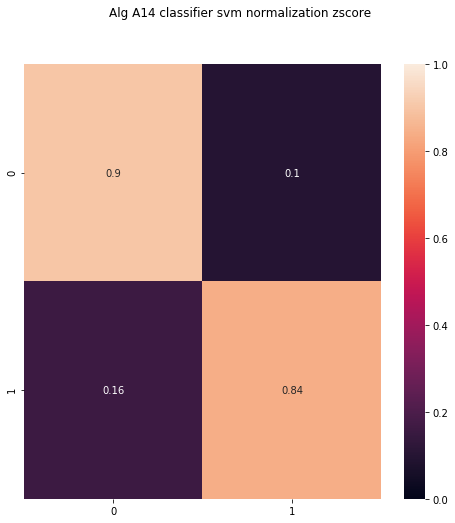

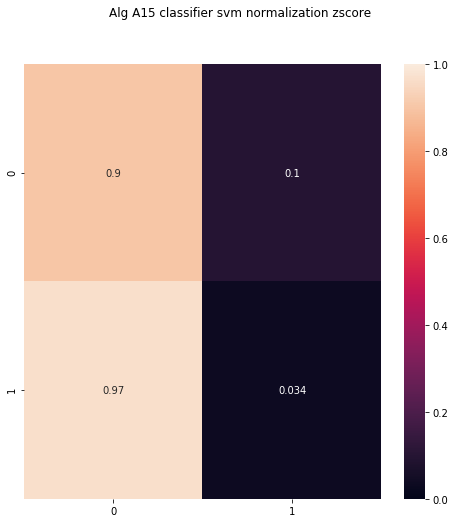

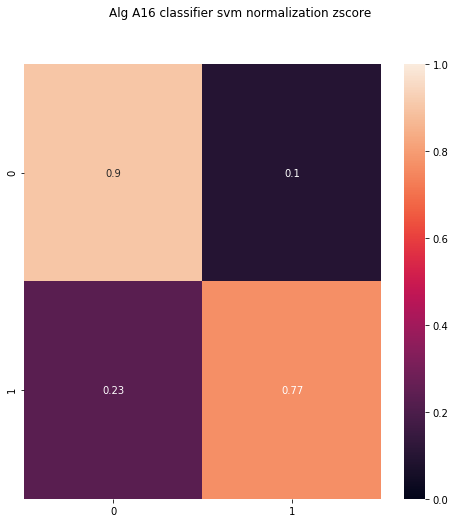

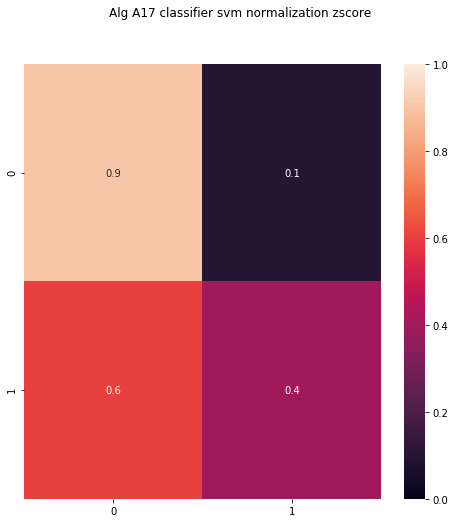

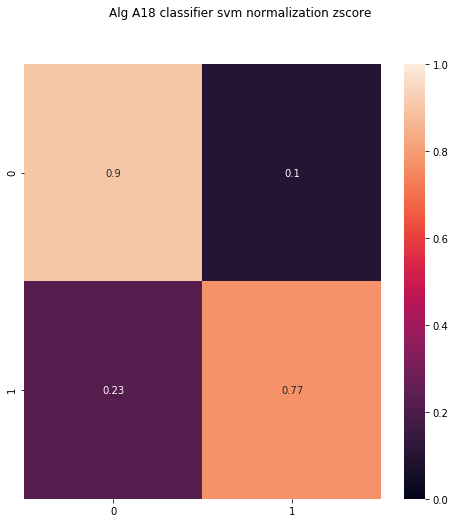

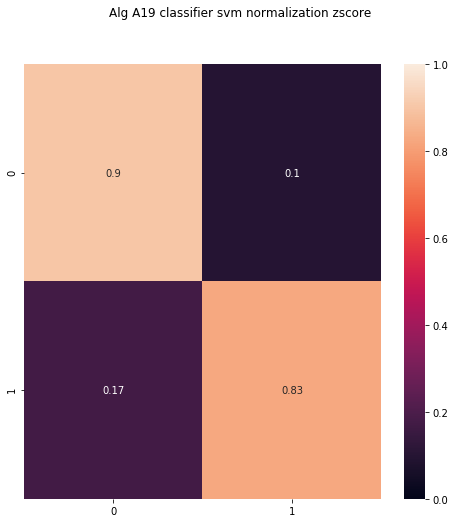

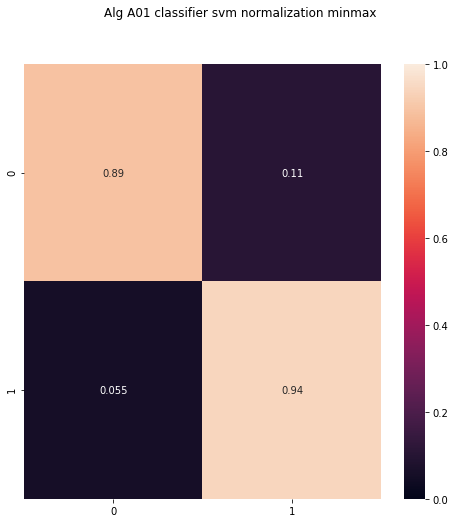

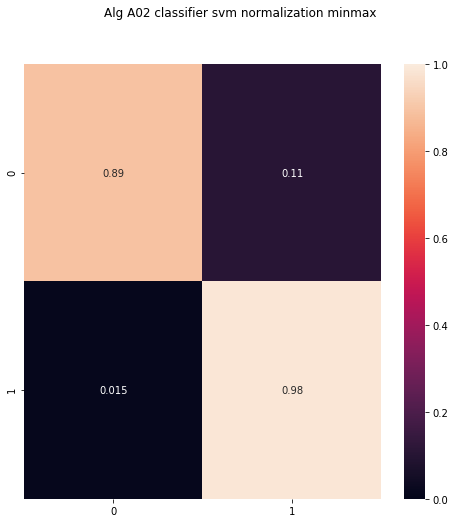

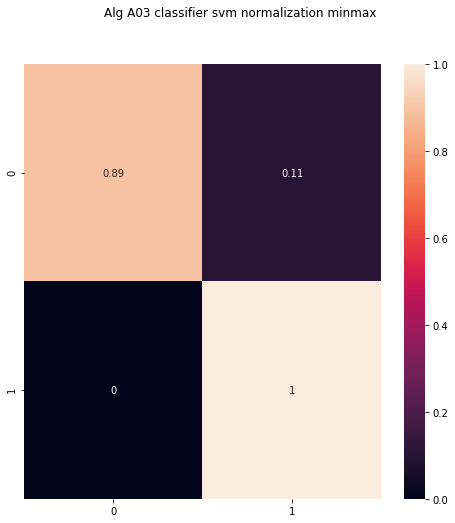

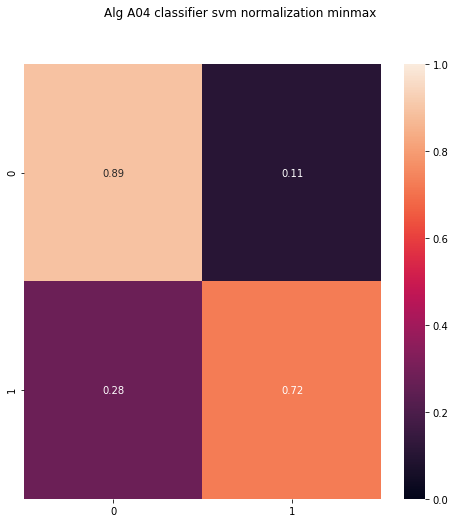

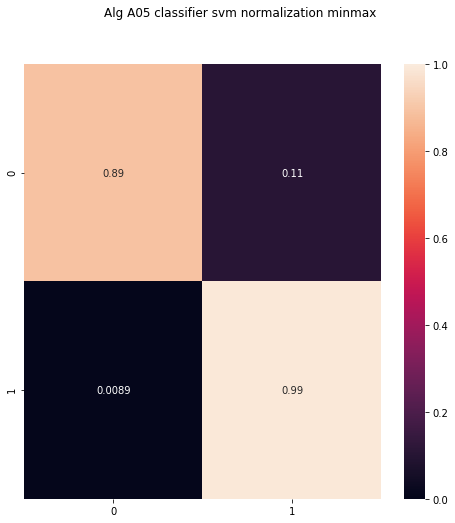

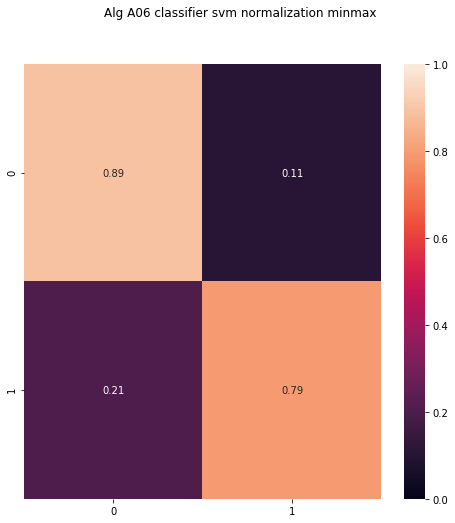

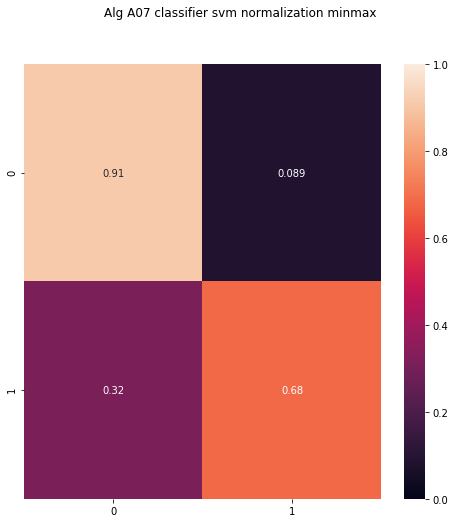

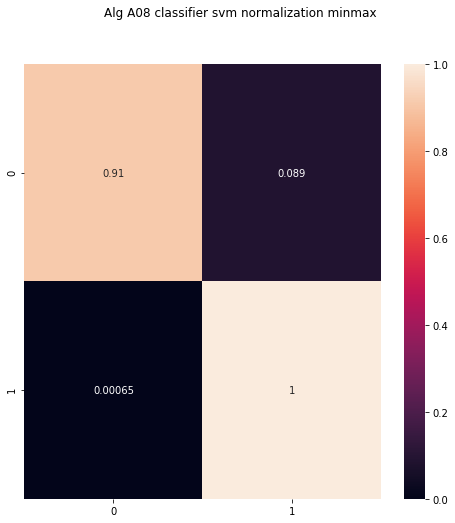

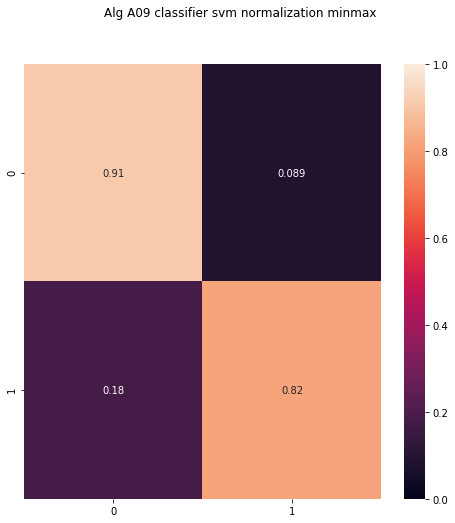

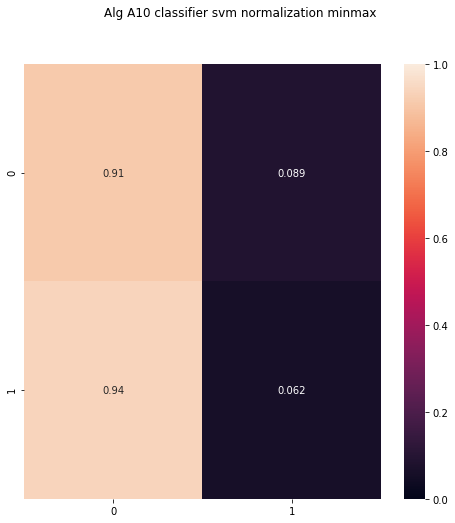

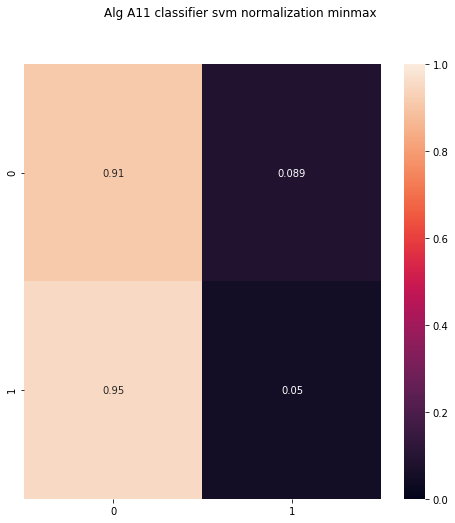

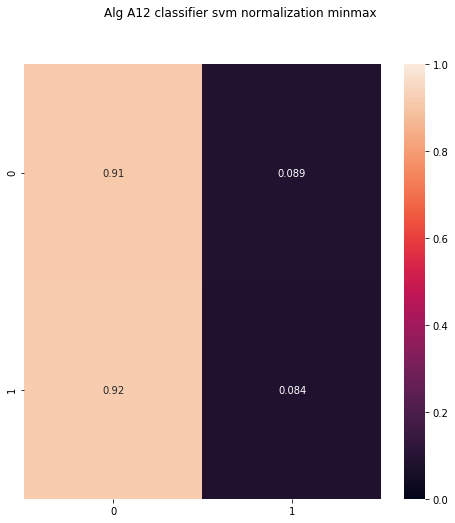

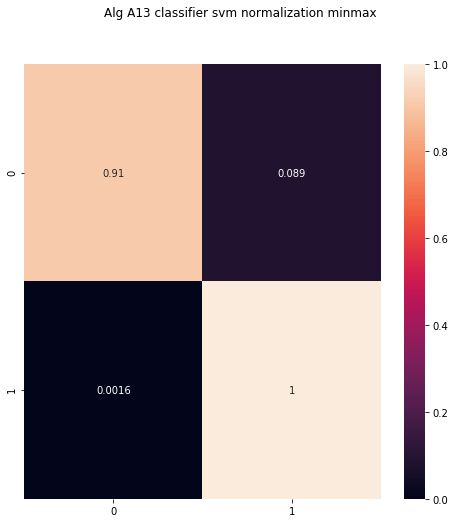

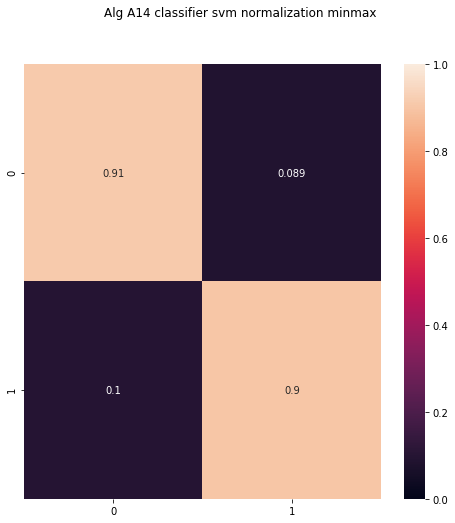

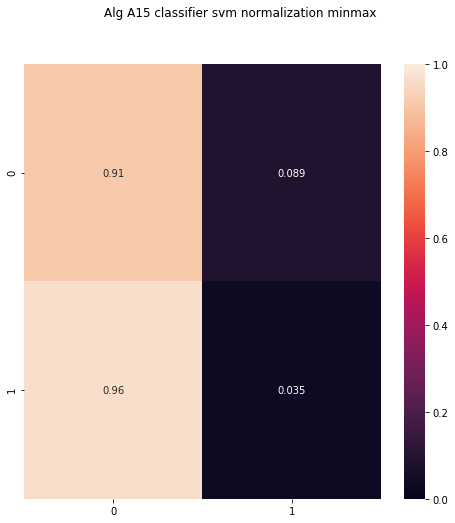

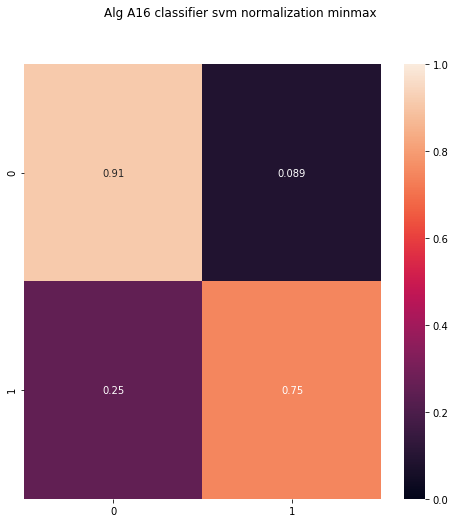

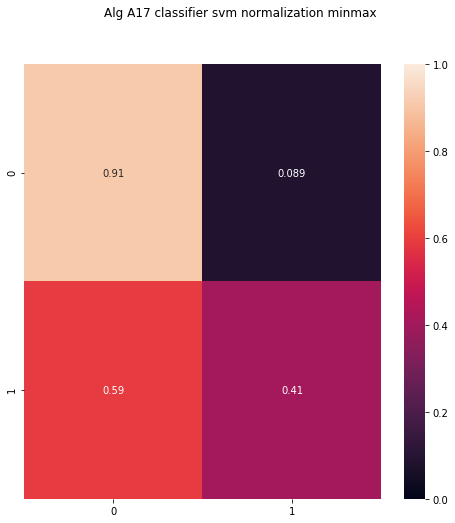

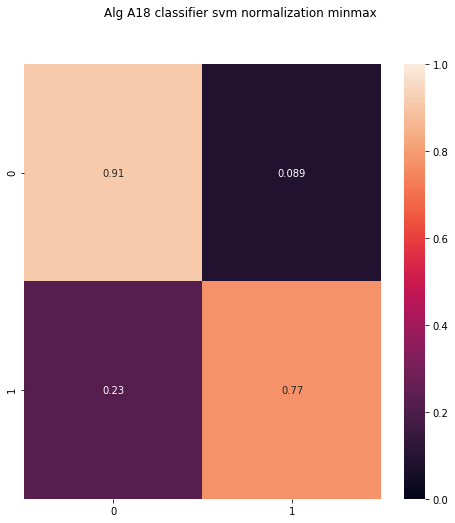

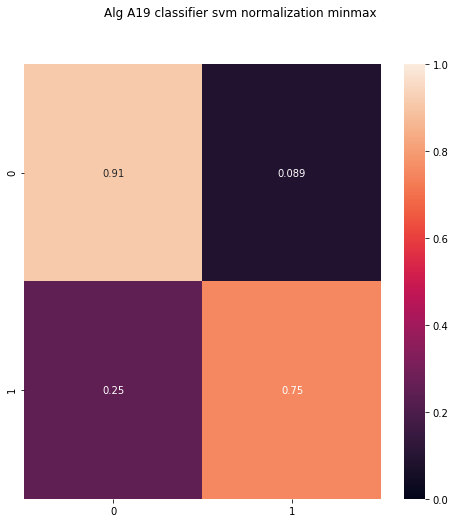

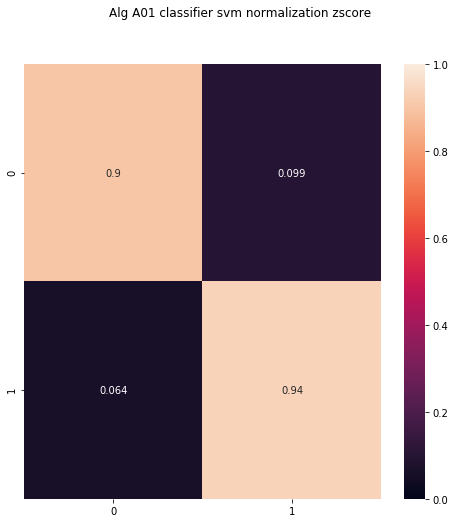

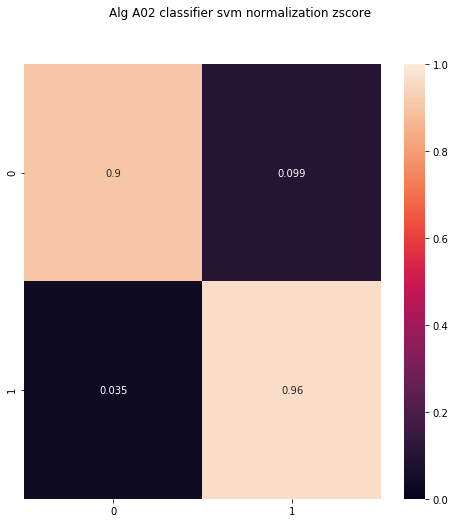

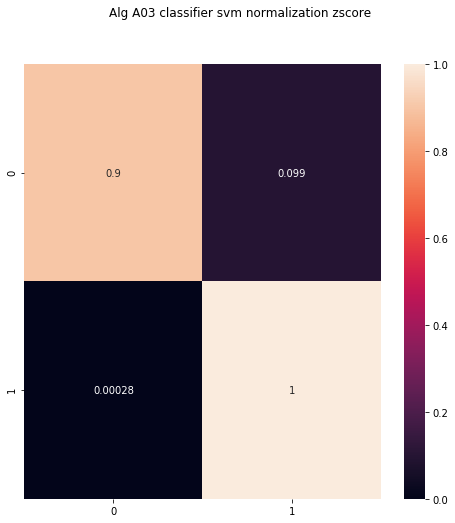

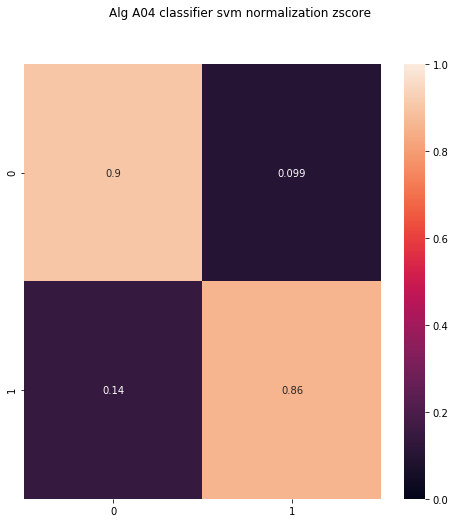

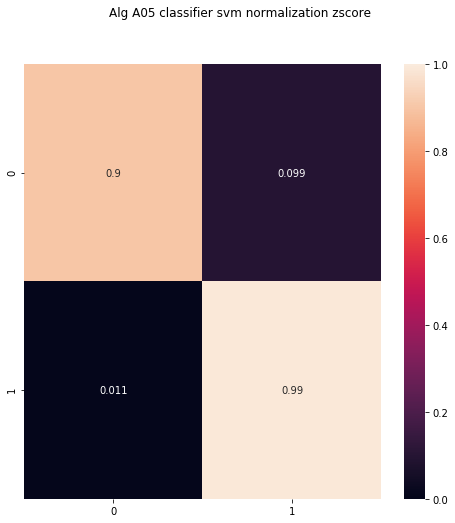

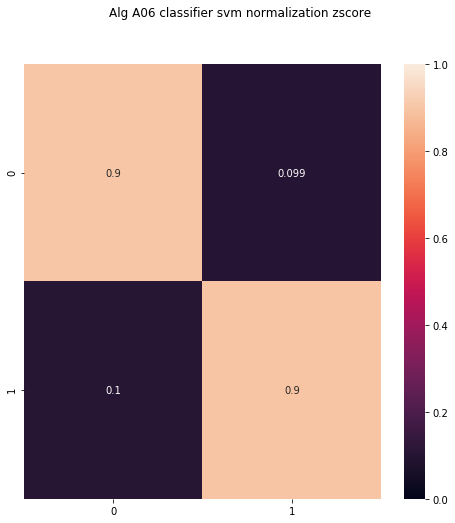

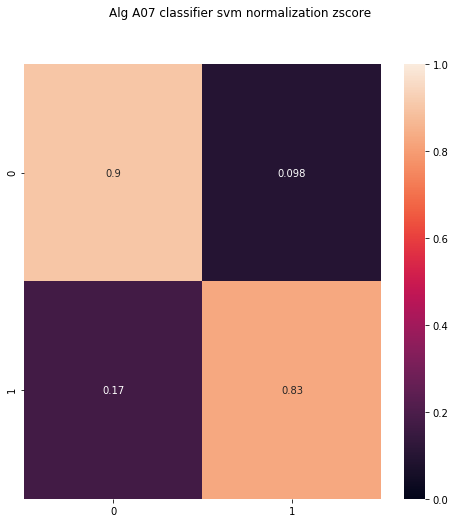

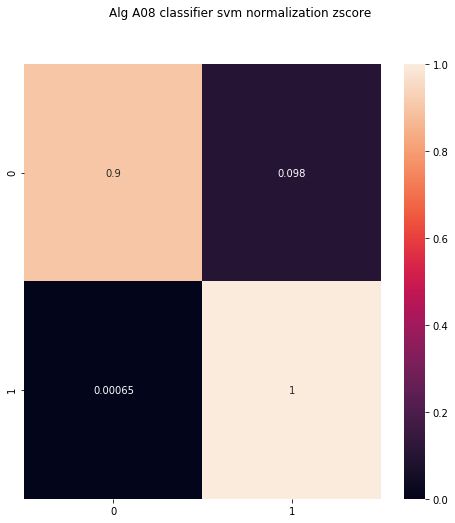

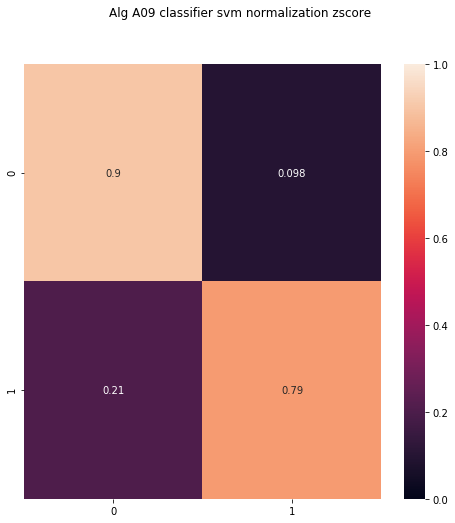

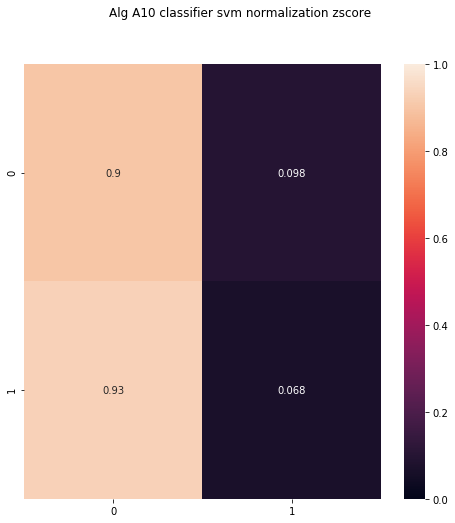

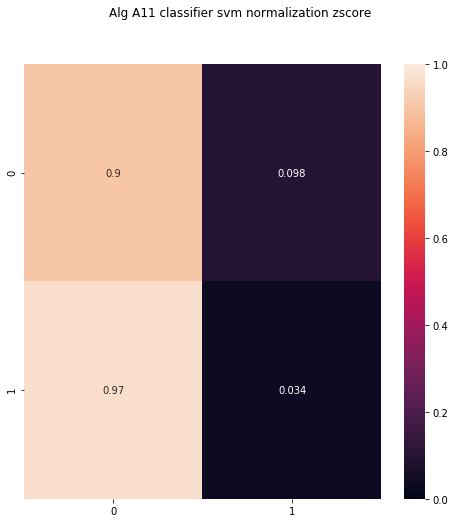

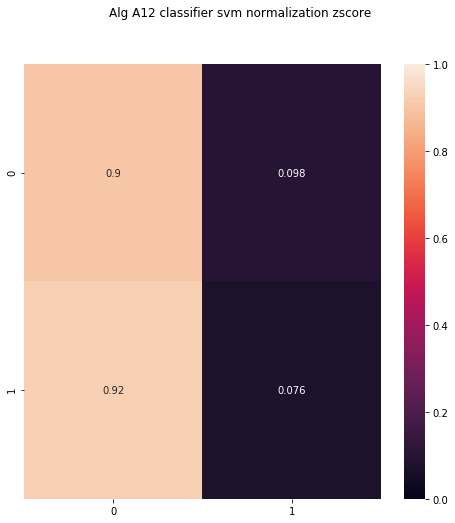

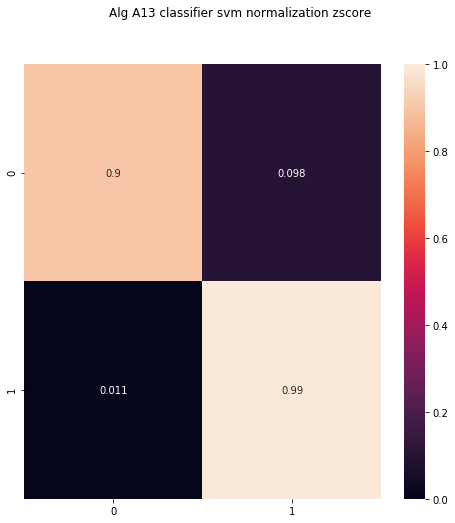

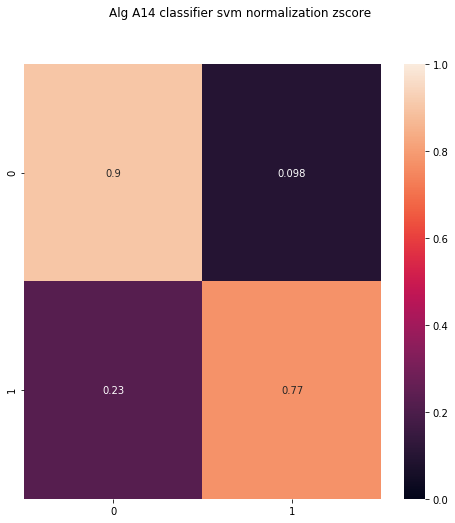

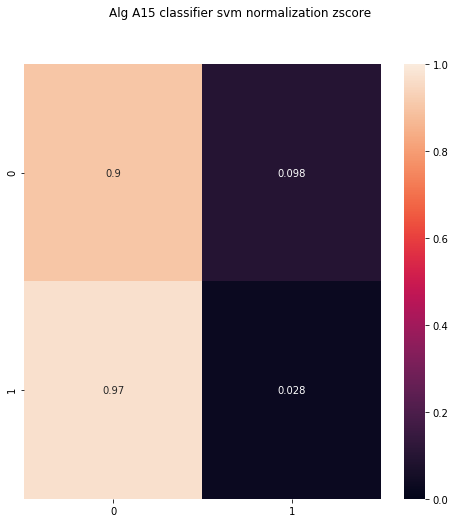

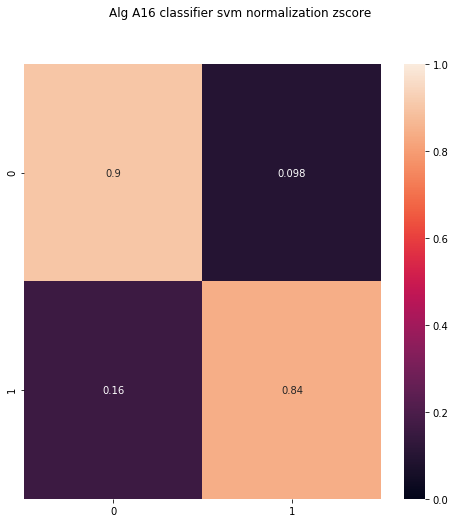

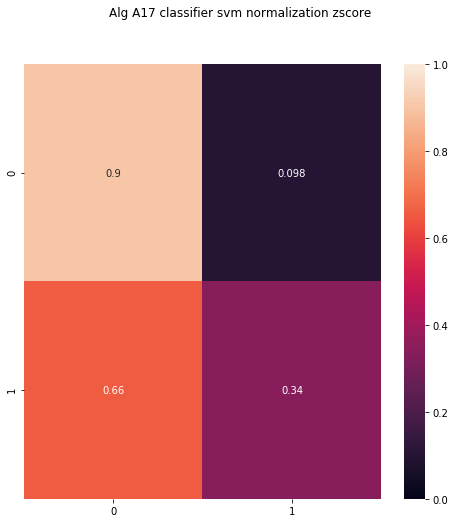

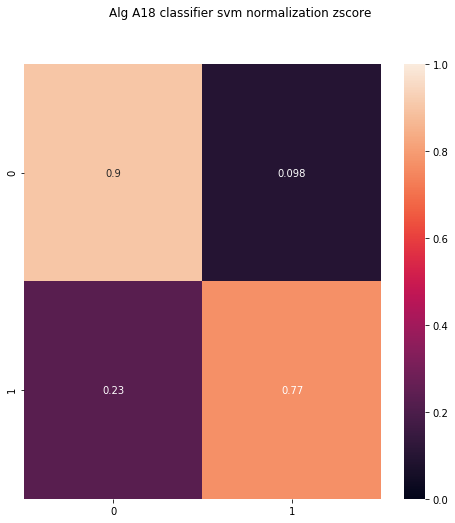

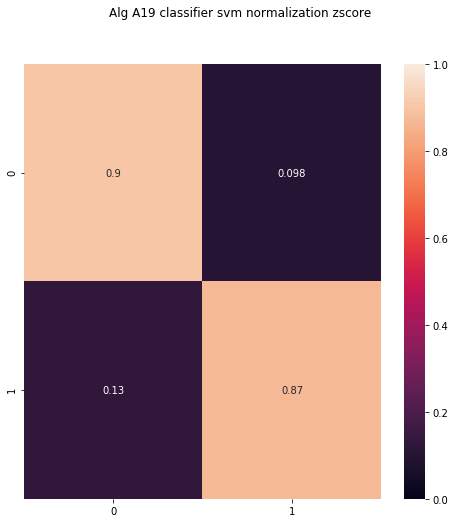

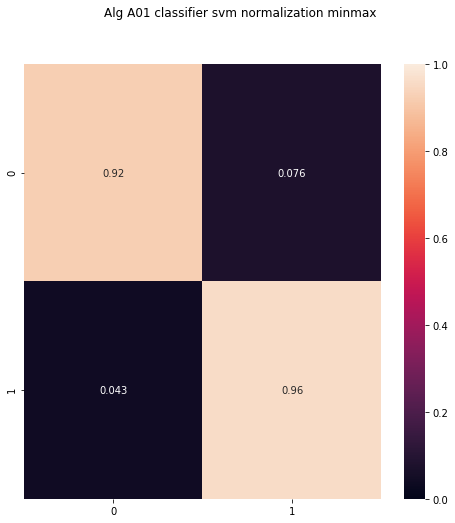

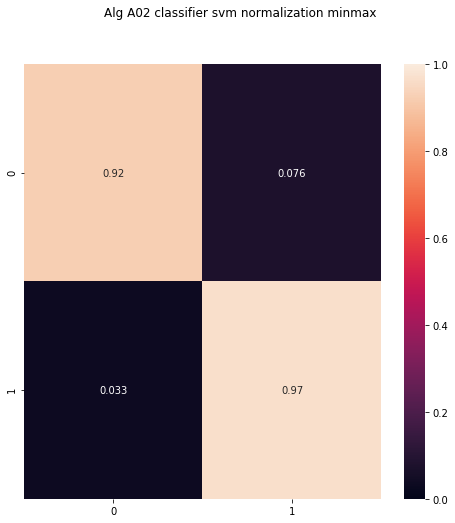

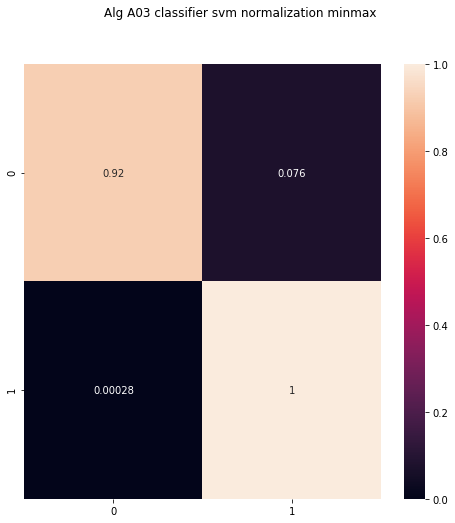

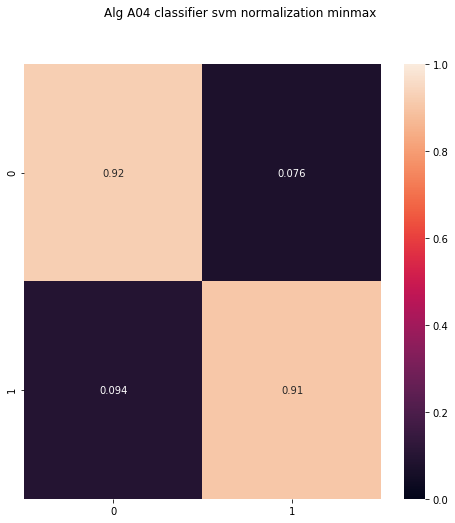

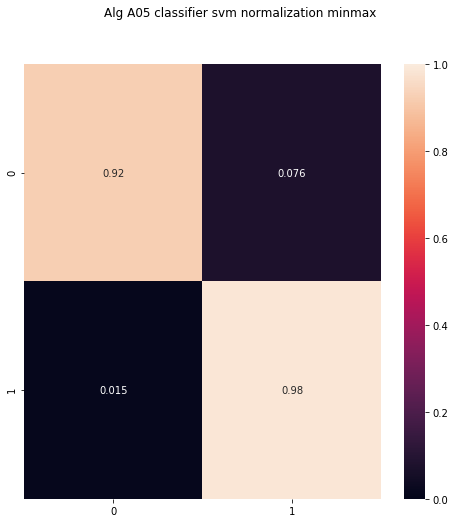

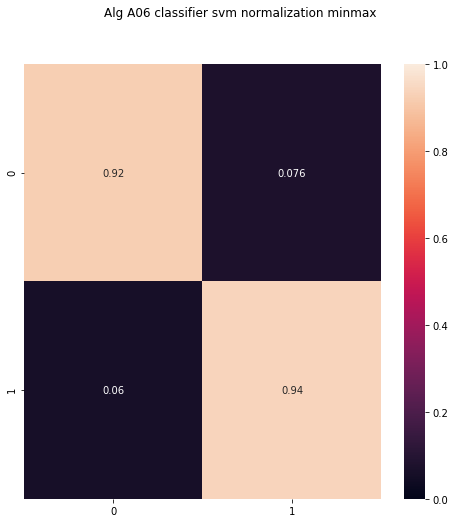

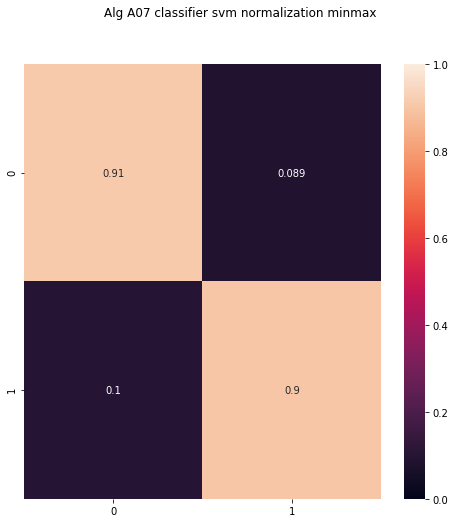

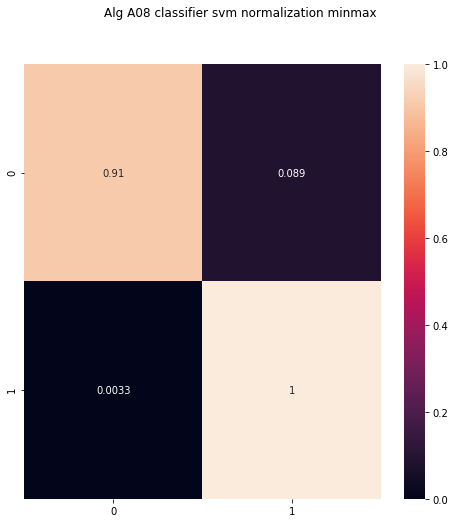

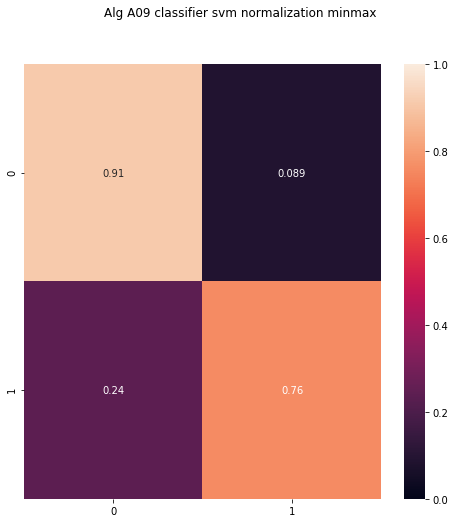

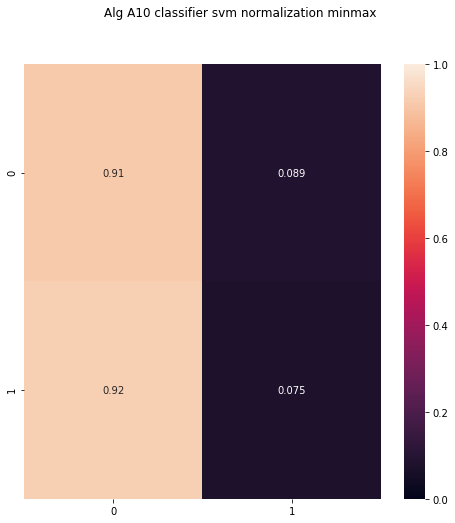

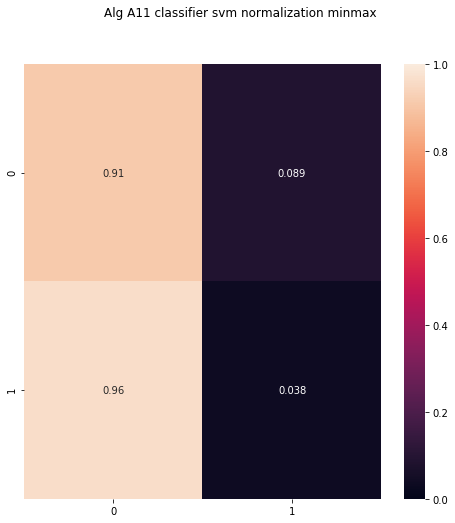

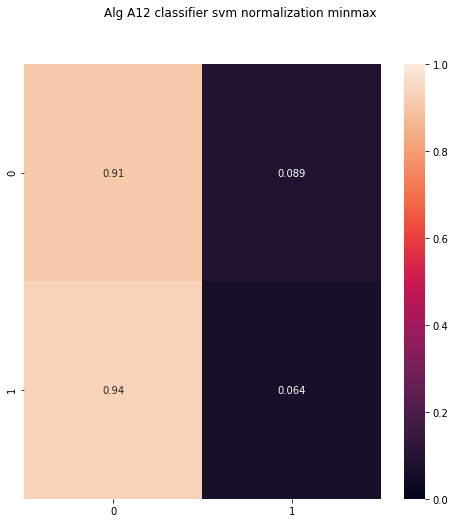

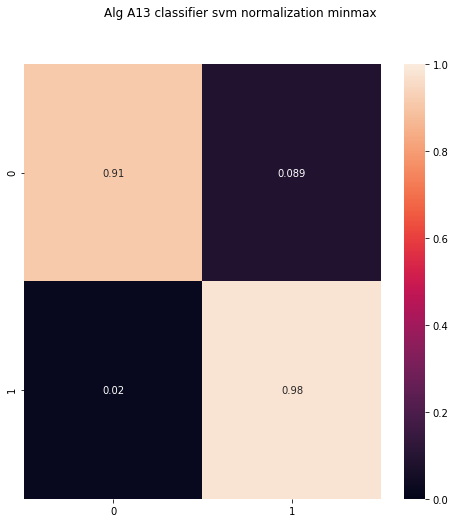

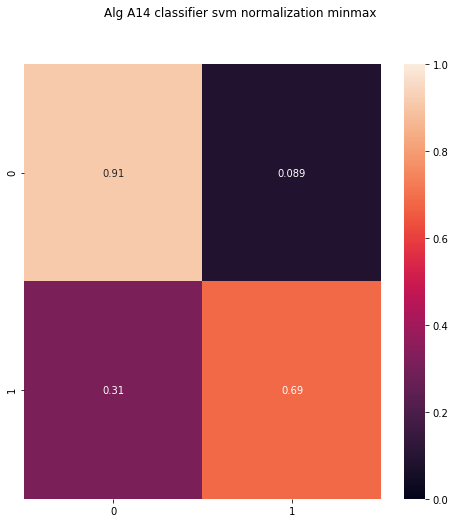

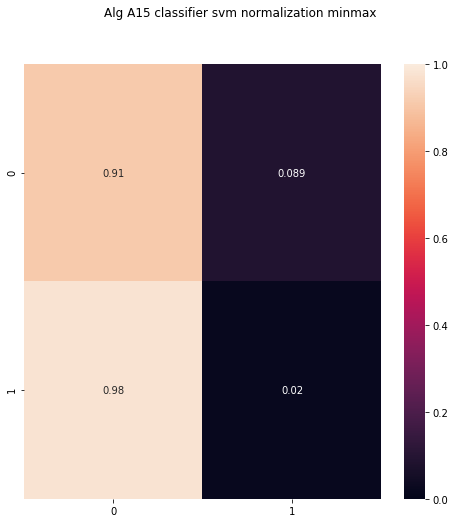

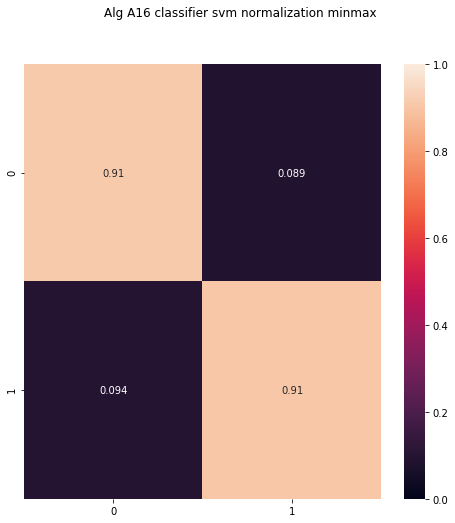

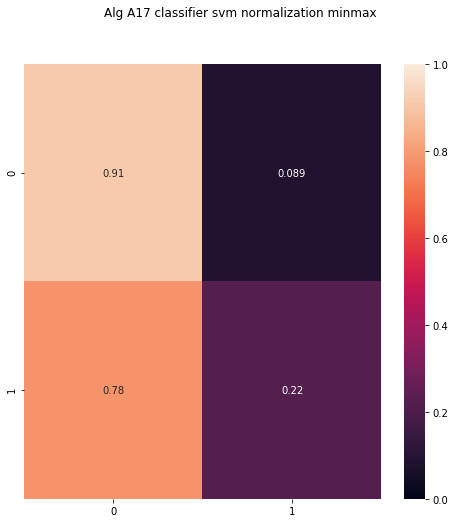

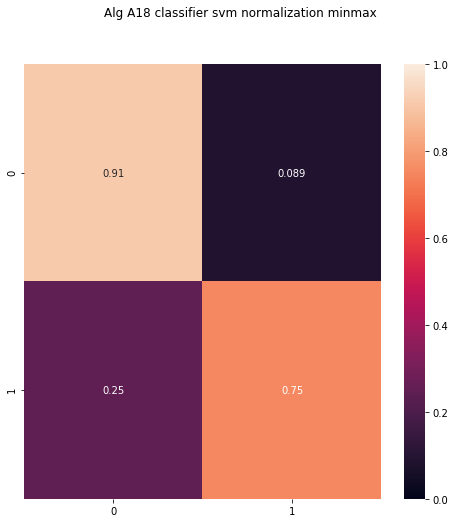

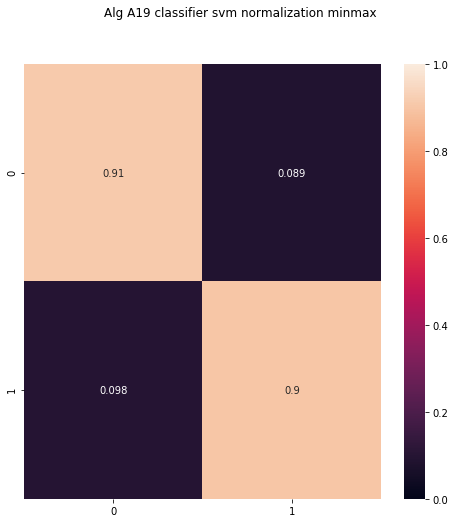

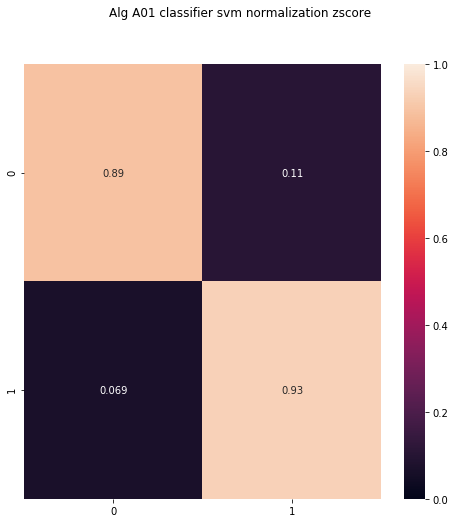

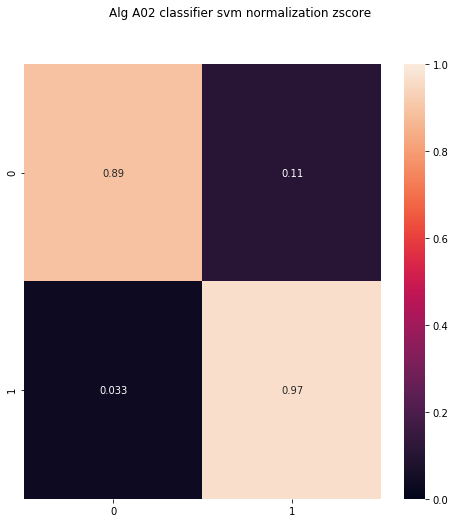

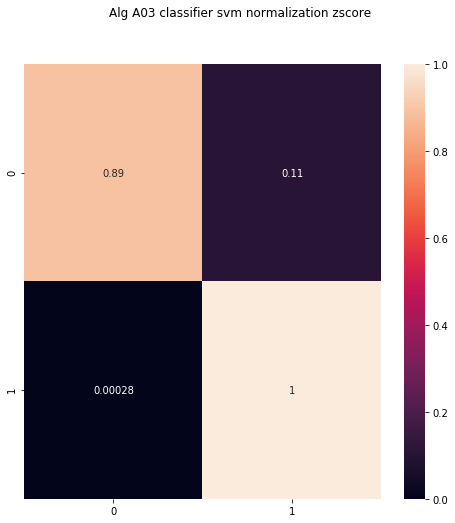

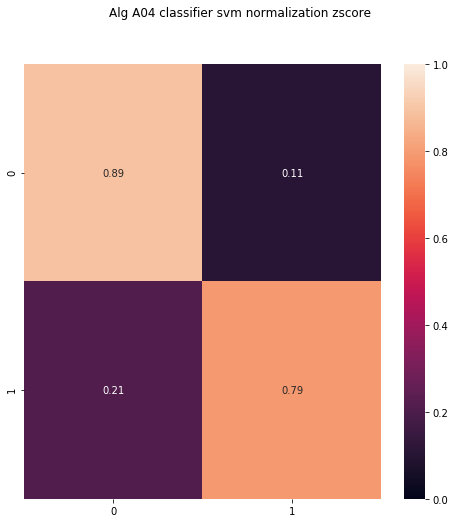

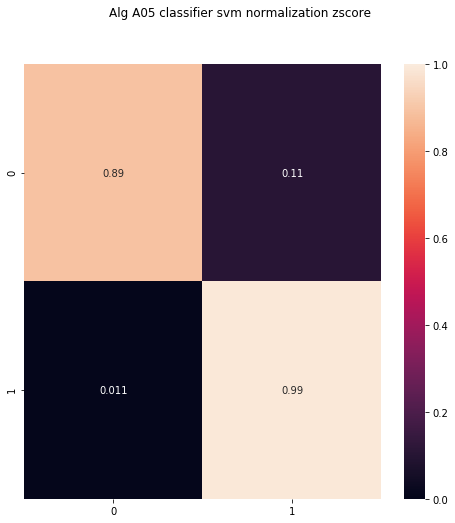

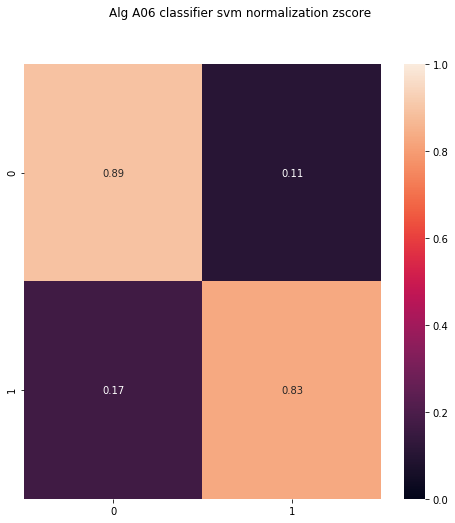

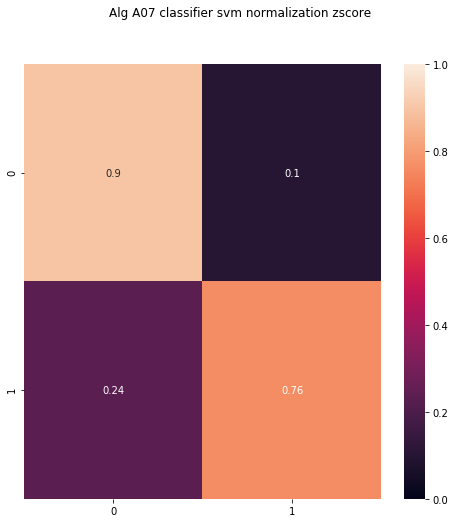

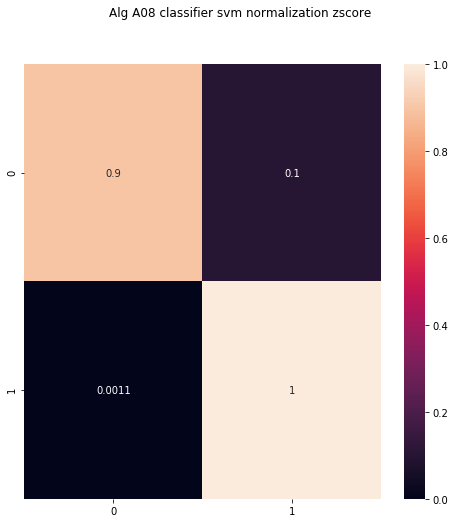

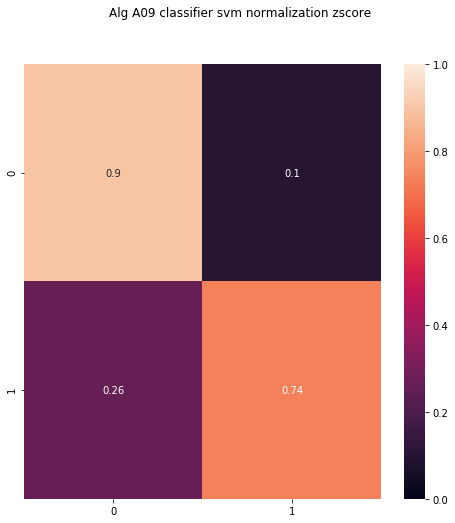

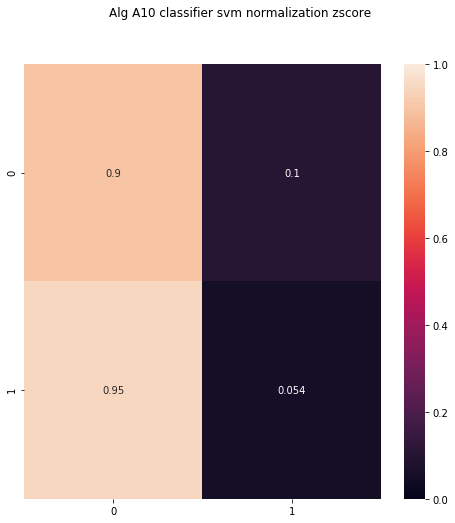

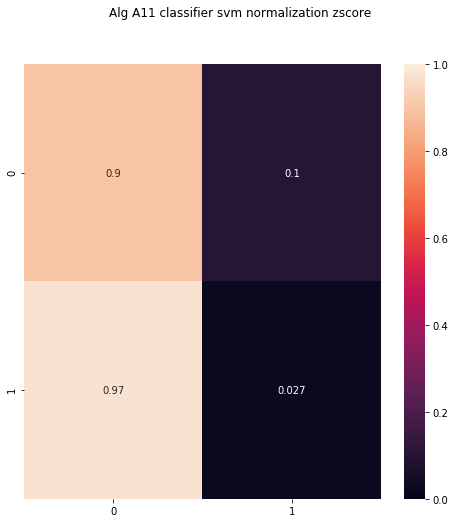

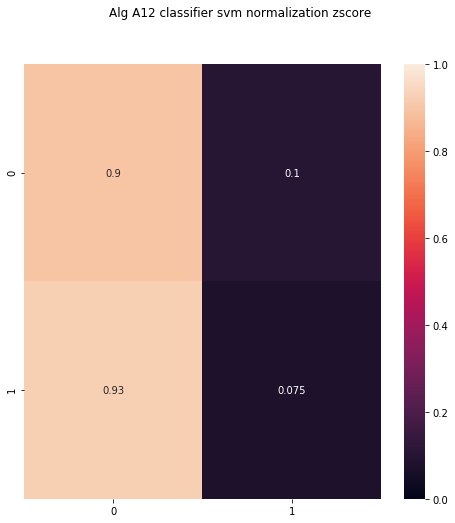

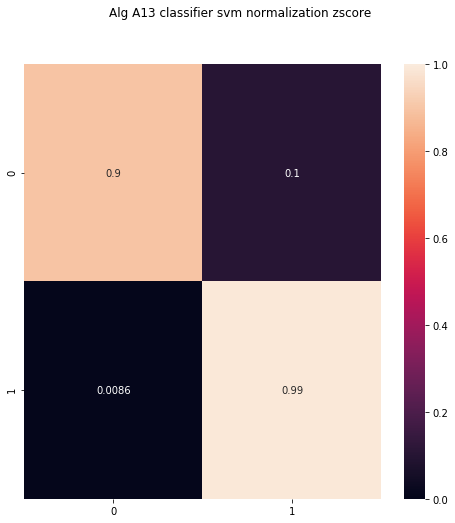

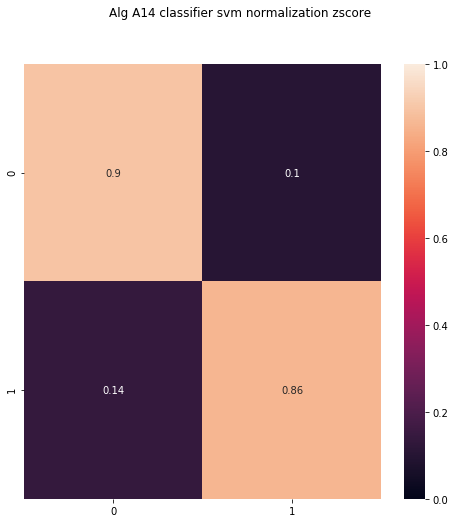

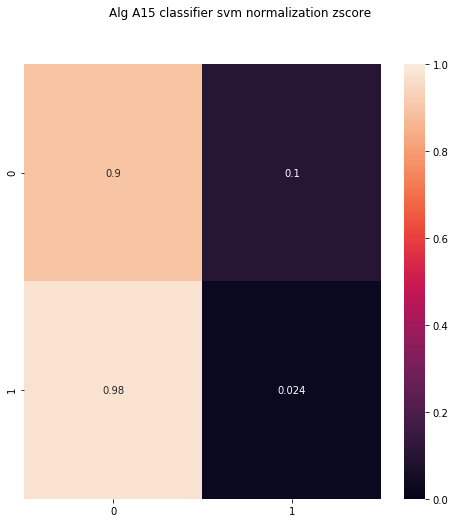

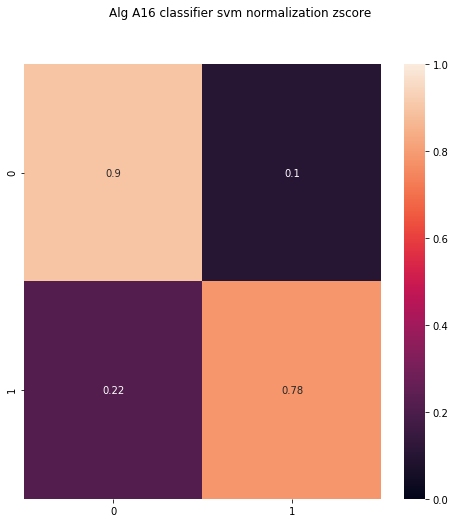

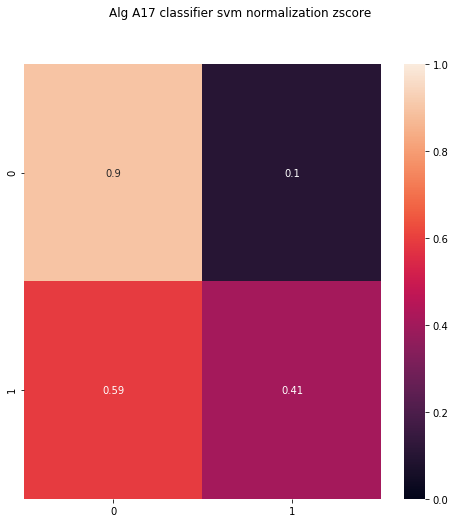

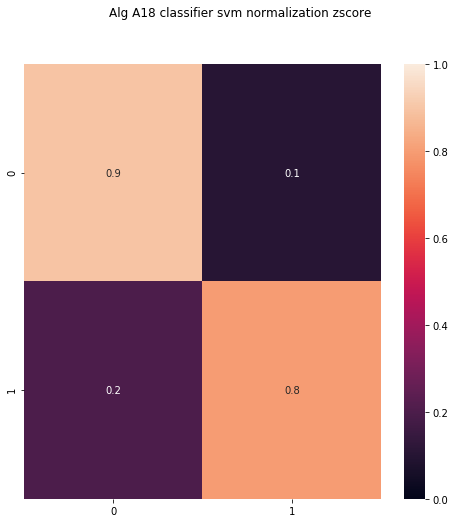

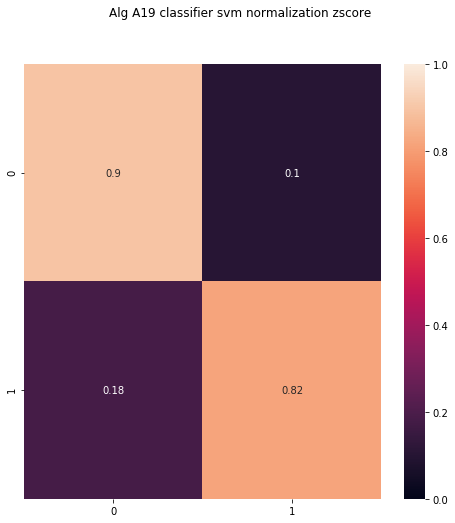

In [46]:
alg_results_df.reset_index(inplace=True, drop=True)
for index, row in alg_results_df.iterrows():
    if row['alg'] in alg_dev_dict:
        
        plt.figure(figsize = (8,8))
        plt.suptitle("Alg {} classifier {} normalization {}".format(row['alg'], row['classifier'], row['normalization']))

        #plt.subplot(131)
        #sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)
        sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)
       
        plt.show()
    if row['alg'] in alg_eval_dict:
        
        plt.figure(figsize = (8,8))
        plt.suptitle("Alg {} classifier {} normalization {}".format(row['alg'], row['classifier'], row['normalization']))

        sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)


In [56]:
features_selected_table = [['bicoh'], ['bicoh'], ['bicoh'], ['lpc'], ['lpc', 'bicoh'], 
                           ['lpc', 'bicoh'], ['lpc', 'bicoh']]
nfft_table = [[512], [256], [128], [], [512], [256], [128]]
hop_size_table = [[256], [128], [64], [], [256], [128], [64]]



In [80]:
columns = zip(features_selected_table, nfft_table, hop_size_table)
for col in columns:
    feat = col[0]
    nfft = col[1]
    nfft = nfft[0]
    hop_size = col[2]
    hop_size = hop_size[0]
    
    if feat == ['lpc']:
        a = alg_results_df[(alg_results_df['selected_features'] == feat)]
    else:
        a = alg_results_df[(alg_results_df['nfft']==nfft) & (alg_results_df['hop_size']==hop_size) & 
                       (alg_results_df['selected_features'] == feat)]
    print('here')

ValueError: Lengths must match to compare

In [81]:
feat

['bicoh']

In [70]:
feat

['lpc', 'bicoh']

In [47]:



alg_results_df.reset_index(inplace=True, drop=True)
for index, row in alg_results_df.iterrows():
    if row['alg'] in alg_dev_dict:
        
        print("Alg {} classifier {} normalization {}".format(row['alg'], row['classifier'], row['normalization']))

        print("Accuracy {}".format(row['accuracy_dev']))
    if row['alg'] in alg_eval_dict:
        print("Alg {} classifier {} normalization {}".format(row['alg'], row['classifier'], row['normalization']))

        print("Accuracy {}".format(row['accuracy_eval']))



Alg A01 classifier svm normalization minmax
Accuracy 0.9174953897555594
Alg A02 classifier svm normalization minmax
Accuracy 0.9400063155250126
Alg A03 classifier svm normalization minmax
Accuracy 0.9472486553578816
Alg A04 classifier svm normalization minmax
Accuracy 0.8052715359680312
Alg A05 classifier svm normalization minmax
Accuracy 0.9425355974149928
Alg A06 classifier svm normalization minmax
Accuracy 0.8453968035060297
Alg A07 classifier svm normalization minmax
Accuracy 0.7954572446555819
Alg A08 classifier svm normalization minmax
Accuracy 0.9554635728740923
Alg A09 classifier svm normalization minmax
Accuracy 0.8824800358775534
Alg A10 classifier svm normalization minmax
Accuracy 0.4917665676852391
Alg A11 classifier svm normalization minmax
Accuracy 0.4890806393998928
Alg A12 classifier svm normalization minmax
Accuracy 0.5040723993008503
Alg A13 classifier svm normalization minmax
Accuracy 0.9548894251548768
Alg A14 classifier svm normalization minmax
Accuracy 0.916148374